# Анализ оттока клиентов банка "Метанпром"

**Описание проекта**

Отдел маркентинга регионального банка "Метанпром" обратился с запросом о проведении анализа анкет клиентов и выявлении сегментов, наиболее склонных к оттоку. Для проведения анализа были предоставлены данные анкет клиентов банка, расположенного в Ярославле и областных городах: Ростов Великий и Рыбинск. Результаты исследования необходимы для разработки стратегии удержания клиентов и должны быть представлены в виде презентации.

**Цель проекта:**

проанализировать характеристики клиентов банка для выявления характерных признаков для оттока и предоставить рекомендации по удержанию клиентов для отдела маркетинга в виде презентации.

- провести исследовательский анализ данных анкет клиентов по каждой характеристике:
 - выявить корреляцию характеристик и факта оттока;
 - определить интервалы значений каждой характеристики с наиболее вероятным оттоком;

**Задачи:**

- знакомство с данными и подготовка к анализу:
 - загрузка и просмотр данных, оценка объёма предобработки данных;
 - предварительная обработка данных (проверка написания названий и ключевых характеристик, проверка наличия дубликатов, проверка наличия выбросов, проверка наличия и заполнение пропусков, изменение типов данных и кодирование для дальнейшей корреляции)
 

- провести исследовательский анализ данных анкет клиентов по каждой характеристике:
 - выявить корреляцию характеристик и факта оттока;
 - определить интервалы значений каждой характеристики с наиболее вероятным оттоком;

- сформировать портрет клиента, склонного к оттоку:
 - сравнить характристики отточных клиентов и не склонных к уходу из банка;
 - обобщить значения характеристик отточных клиентов в признаки;

 - сформулировать гипотезы о разнице важных для оттока характеристиках клиента;
 - сформулировать дополнительные гипотезы;

- проверить гипотезы о различиях характеристик клиентов:
 - проверить гипотезу о различии дохода между клиентами, которые ушли, и теми, которые остались;
 - проверить гипотезу о представленных данных;
 - проверить сформулированные дополнительные гипотезы;

- на основании признаков оттока сформирвать сегменты:
 - сегментировать имеющиеся анкеты клиентов и приоретизировать полученные сегменты;

 - сформулировать рекомендации по наиболее приоритетеным сегментам;

- предоставить итоги и выводы в виде презентации для отдела маркетинга.

Описание данных.

Предоставленный датасет содержит данные о клиентах банка, полученные в ходе заполнения анкет. 

Колонки:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

**Материалы**

ознакомиться с презентацией по проделанной работе можно по ссылке:
https://docs.google.com/presentation/d/1yytzIhLd3WUTA6s3UM12gJQfdvhNv18Mln2EcwGNGKA/edit?usp=sharing

## Загрузка данных

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
# Импортируем необходимые для работы с данными библиотеки:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import scipy.stats as st
from scipy import stats
from scipy.stats import skew, mode

# Сделаем графики более чёткими и читаемыми:
%config InlineBackend.figure_format = 'retina'

In [3]:
# Загружаем данные:
try:
    data = pd.read_csv(r'')
except:
    data = pd.read_csv(r"")

In [4]:
# Ознакомимся с данными:
#выведем первые строки таблицы
display(data.head())
# выведем информацию о столбцах
print(data.info())
print()
#подсчитаем явные дубликаты
print(f'Количество явных дубликатов: {data.duplicated().sum()}')
# выведем характеристики описательной статистики по столбцам
print('Основные характеристики описательной статистики числовых столбцов:')
display(data.describe().T)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Количество явных дубликатов: 0
Основные характеристики описательной статистики числовых столбцов:


,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


В полученной таблице 10000 строк и 12 столбцов. 

- Необходимо изменить написание названия некоторых столбцов, чтобы избежать ошибок.
- Значения столбца с данными возраста следует изменить на целочисленные, чтобы не перегружать подписи осей визуализаций.
- Столбцы с возрастом и балансом имеют пропуски, которые надо проверить на возможность заполнения.
- Исходя из данных описательной статистики:
  - столбец с баллами кредитного скорринга имеет нормальное распределение, без выбросов, значения принимают целые величины от 642 до 1000 баллов, поэтому этот столбец также можно сделать целочисленным;
  - столбец с возрастом имеет пропуски, не имеет существенных выбросов, семщающих среднее относительно медианы, занчения принимают целые числа от 18 до 86;
  - столбец с количеством баллов собственности так же принимает целочисленные значения от 0 до 9, скорее всего не имеет выбросов;
  - столбец с величиной баланса имеет дробные значения, существенную разницу между медианным и средним значением и большое количество пропусков;
  - столбец с количеством используемых продуктов принимает целочисленные значения от 0 до 5, не имеет пропуски, но значение 0 кажется подозрительным;
  - столбцы наличия кредитной карты и активности принимают значения 0 и 1, поэтому их тип следует изменить на bool;
  - величина оценочного дохода принимает значения с разницев в несколько порядков, что сказывается на разнице между медианой и средним;
  - столбец факта оттока имеет значения 0 и 1, поэтому его тип следует изменить на bool.

**Выводы**

- Необходимо изменить написание названия столбцов USERID и EST_SALARY.
- Проверить столбцы city и gender на правильное написание текстовых значений.
- Данные столбцов age и balance содержат пропуски, которые необходимо проверить на возможность заполнения.
- Изменить тип столбцов score и age на целочисленный int.
- Изменить тип столбцов credit_card, last_activity и churn на булев bool.
- Проверить столбец products на наличие выбросов.
- Проверить распределение и наличие выбросов в столбце EST_SALARY и balance.

 ## Подготовка данных к анализу.
 
 ### Изменение названия столбцов

На этапе знакомства с данными было отмечено два нессответствия shake регистру в названиях столбцов. Это необходимо исправить, приведя их к нижнему регистру и добавив разделитель.

In [5]:
data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Проверка написания текстовых значений

Тесктовыми являются данные двух столбцов: названия городов и одоначение пола клиента. Необходимо проверить, что в написании этих данных нет ошибок, которые могут привести к дублированию информации.

In [6]:
print('Названия городов:', data['city'].unique())
print('Обозначения пола:', data['gender'].unique())

Названия городов: ['Рыбинск' 'Ярославль' 'Ростов']
Обозначения пола: ['Ж' 'М']


### Проверка наличия скрытых дубликатов

Все характреристики клиентов могут повторяться, ожнако предполагается, что столбец user_id содежит уникальные идентификационные номера, которые не повторяются и принадлежат только одному клиенту. Проверка скрытых дубликатов должна проводиться по нескольким столбцам, в первую очередь по идентификатору.

In [7]:
data.duplicated(subset=['user_id']).sum()

73

При проверке наличия дубликатов в столбце с индивидуальным номером клиента обнаружены 73 повтора. Проверим, не образовались ли они при слияннии баз данных трёх городов. Для этого выведем дубликаты идентификаторов и проверим заполненность других столбцов, особенно города, пола, возраста, количества продуктов.

In [8]:
# выведем строки с повоторяющимися идентификаторами клиентов:
data[data.duplicated(subset = ['user_id'], keep = False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


In [9]:
# проверим строки на наличие дубликатов по столбцам идентификатора и города:
data.duplicated(subset=['user_id', 'city']).sum()

0

Так и есть, при проверки по двум столбцам (id и город) дубликатов не обнаружено, возможно номера идентификаторов совпали у клиентов разных городов или были ошибочно расшифрованы при слиянии баз данных, например, при отбрасывании внутреннего кода города от уникального номера анкеты. Столбец с id клиента в исследовании не понадобится, поэтому его можно удалить, оставив все строки с остальными характеристиками.

In [10]:
# удалим столбец с идентификатором
data.drop('user_id', axis=1, inplace=True)

In [11]:
# проверим данные:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          10000 non-null  float64
 1   city           10000 non-null  object 
 2   gender         10000 non-null  object 
 3   age            9974 non-null   float64
 4   equity         10000 non-null  int64  
 5   balance        7705 non-null   float64
 6   products       10000 non-null  int64  
 7   credit_card    10000 non-null  int64  
 8   last_activity  10000 non-null  int64  
 9   est_salary     10000 non-null  float64
 10  churn          10000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 859.5+ KB


In [12]:
# проверим, не появились ли дубликаты:
data.duplicated().sum()

0

### Заполнение пропусков

На этапе ознакомления с данными пропуски были обнаружены в двух столбцах: возраст и баланс на счёте.

In [13]:
# посчитаем количество пропусков в столбцах:
data.isna().sum()

score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Ознакомимся с 26 пропусками в столбце возраста. 

In [14]:
data[data['age'].isna()]

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Пропуски в столбце возраста выглядят не систематичными и могут быть отнесены к категории MSAR (Отсутствует совершенно случайно). 
Пропусков в столбце величины баланса на счёте много, необходимо проанализировать их на наличие зависимости от других характеристик клиента.

In [15]:
# создадаим рабочую копию данных:
df = data.copy()
# в рабочей копии создадим числовые столбцы, кодирующие наличие пропуска:
df['age_pass'] = np.where(df['age'].isna(), 1, 0)
df['balance_pass'] = np.where(df['balance'].isna(), 1, 0)

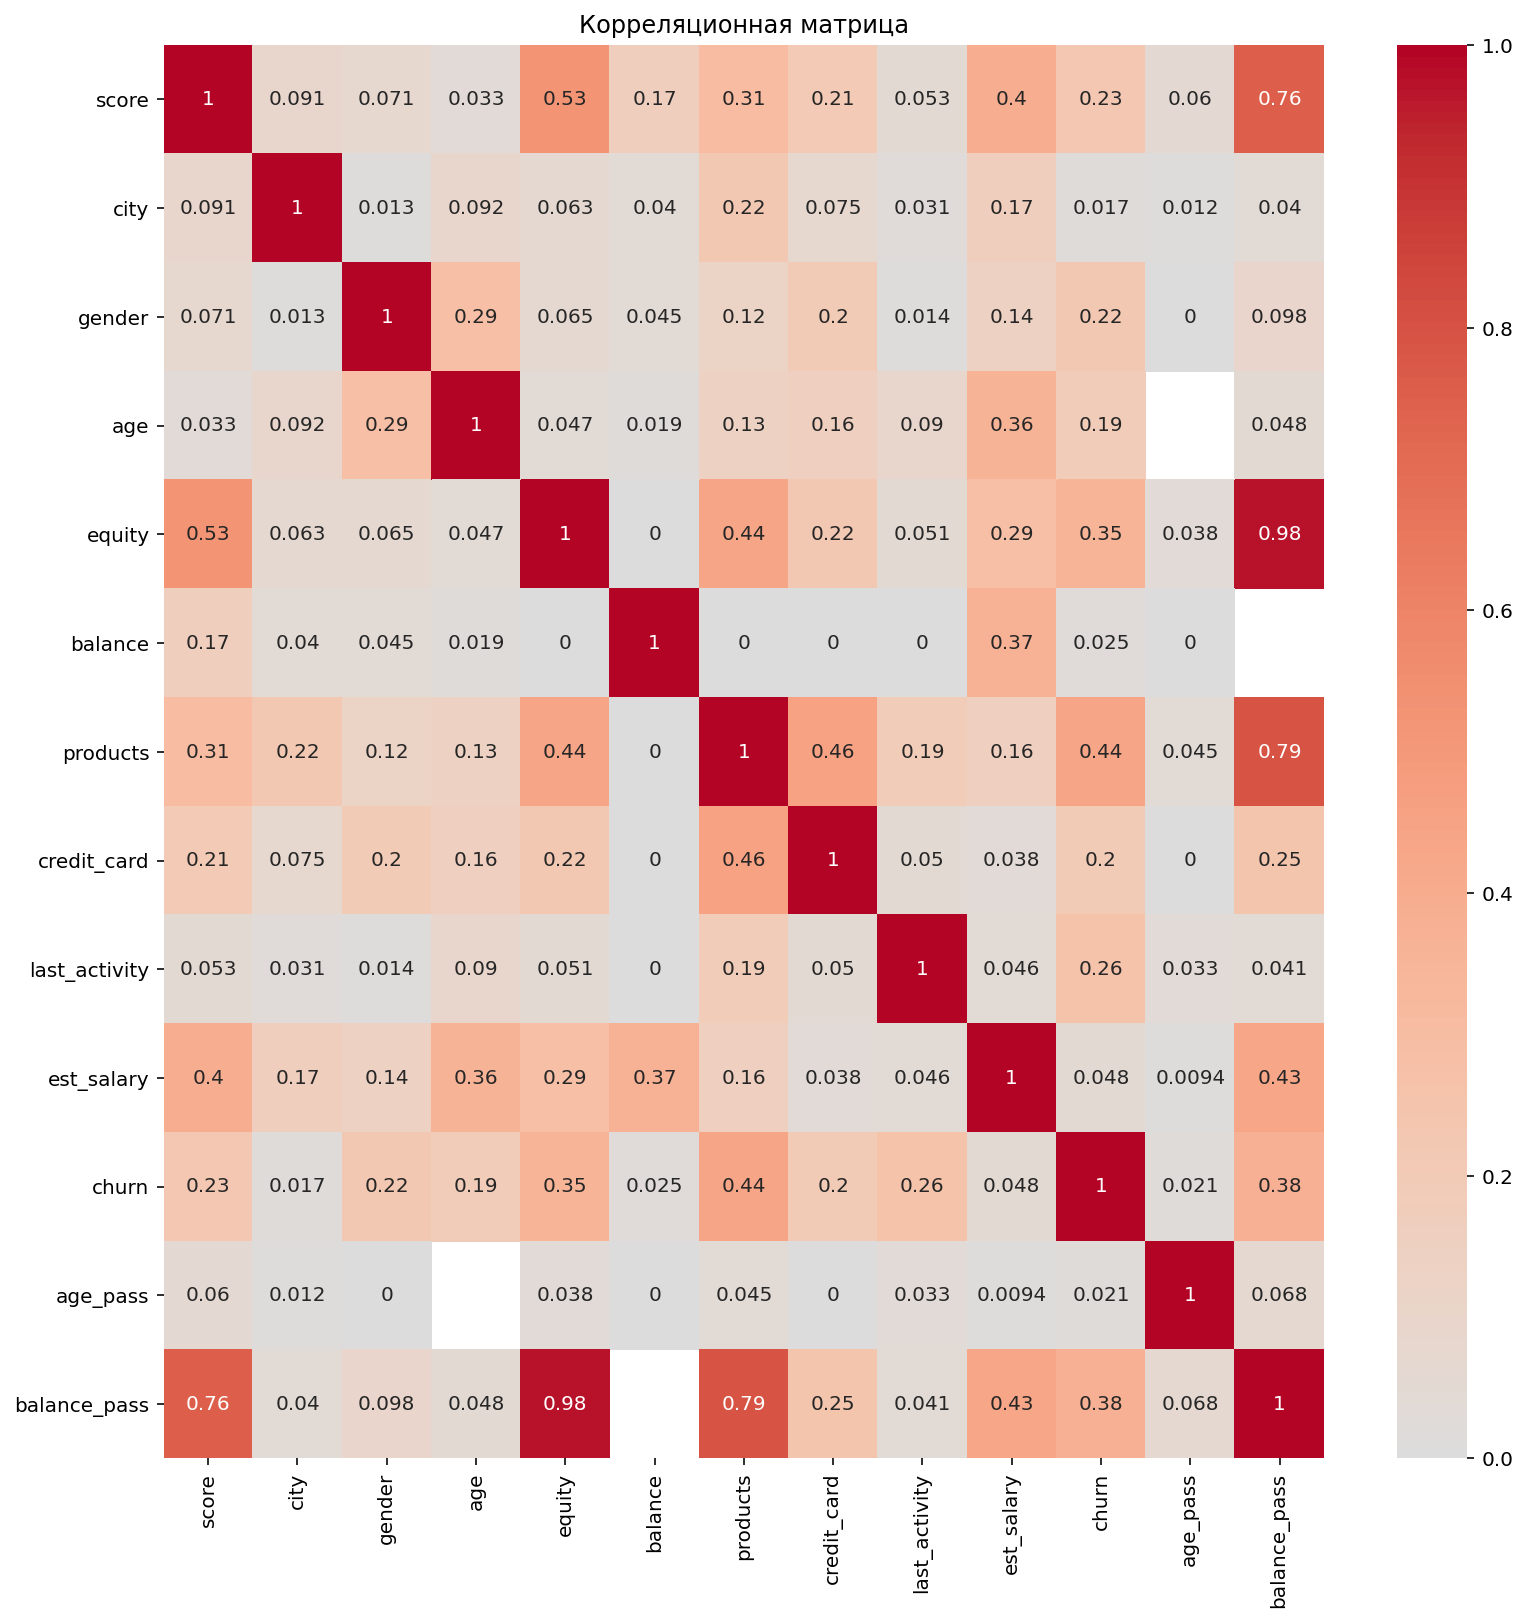

In [16]:
# визуализируем матрицу корреляций в виде heatmap:
plt.figure(figsize=(13, 13))
sns.heatmap(df.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary']), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Корреляционная матрица')
plt.show()

- Как и предполагалось, факт пропусков в столбце "age" не зависит от других характеристик. Их стоит отнестик MCAR(Отсутствует совершенно случайно), так как они скорее всего возникли в результате расчёта и переноса данных(например, не верно расчитаны из столбца даты рождения и даты формирования данных) или человеческого фактора. Несмотря на малочисленность, удалять эти данные не следует, так как строки содержат много других характеристик, поэтому отсутствующие значения можно заменить медианой, которая позволит избежать экстреммумов.

- На факт наличия пропуска в столбце баланса на счёте существенно влияет значение столбца "equity", немного количество используемых продуктов банка, оценочный доход клиента и отток. Эти значения нельзя удалять или заполнять одной величиной, так как множественные корреляции говорят о наличии сложных зависимостей. Эти пропуски следует отнести к MNAR (Отсутствует не случайно). Если взять в расчёт характеристики, с которыми коррелируется факт пропуска, можно предположить, что это клиенты с малыми величинами баланса на счёте, количеством собственности и низким оценочным доходом, которые наиболее подвержены оттоку. Так же это могут быть новые клиенты, у которых ещё мало сведений о движении на счёте и мало продуктов банка.

In [17]:
# заполним пропуски возраста медианным значением:
data['age'] = data['age'].fillna(data['age'].median())

In [18]:
# проверим количество пропусков:
data.isna().sum()

score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски в столбце возраста были заполнены медианным значением. Пропуски в столбце баланса было решено оставить без изменения, так как они не являются случайными, а выявить закономерность их появления в рамках данного анализа не представляется возможным.

### Изменение типов данных

In [19]:
# проверим типы выбранных для замены столбцов:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          10000 non-null  float64
 1   city           10000 non-null  object 
 2   gender         10000 non-null  object 
 3   age            10000 non-null  float64
 4   equity         10000 non-null  int64  
 5   balance        7705 non-null   float64
 6   products       10000 non-null  int64  
 7   credit_card    10000 non-null  int64  
 8   last_activity  10000 non-null  int64  
 9   est_salary     10000 non-null  float64
 10  churn          10000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 859.5+ KB


Проверим, что в столбцах, предполагающих ответ да/нет, есть только значения 0 и 1, чтобы перевести их в булев тип.

In [20]:
# создадим список столбцов для проверки:
list = ['last_activity', 'credit_card', 'churn']
# проверим наличие ошибочных записей:
for column in list:
    print(column, data[column].loc[(data[column]!=0)&(data[column]!=1)].unique())

last_activity []
credit_card []
churn []


Значения правильные, ошибки при переводе типа не будет. Столбцы с возрастом и рейтингом следует перевести в целочисленный тип, чтобы проще обрабатывать и визуализировать.

In [21]:
# изменим типы выбранных столбцов:
data = data.astype({'age':'int', 'score':'int', 'credit_card':'bool', 'last_activity':'bool', 'churn':'bool'})
# проверим изменения:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          10000 non-null  int64  
 1   city           10000 non-null  object 
 2   gender         10000 non-null  object 
 3   age            10000 non-null  int64  
 4   equity         10000 non-null  int64  
 5   balance        7705 non-null   float64
 6   products       10000 non-null  int64  
 7   credit_card    10000 non-null  bool   
 8   last_activity  10000 non-null  bool   
 9   est_salary     10000 non-null  float64
 10  churn          10000 non-null  bool   
dtypes: bool(3), float64(2), int64(4), object(2)
memory usage: 654.4+ KB


Изменения прошли успешно.

### Проверка наличия выбросов

На данном этапе необходимо проверить, есть ли в данных значения, которые не попадают в статистический размах, и оценить, могут ли они повлиять на решение поставленной задачи.

In [22]:
# создадим функцию, выводящую график распределения и диаграмму размаха:
def analyse(column, x_name, description_name):
    # выведем описательную статистику:
    print('Статистисческие параметры данных')
    display(data[column].describe())
    
    plt.figure(figsize=(18, 5)) # общие условия формата графиков
    
    # создание графика разброса значений параметра:
    plt.subplot(1, 2, 1)
    data[column].plot(style='o', markersize = 2, grid=True)
    plt.xlabel('Индекс клиента')
    plt.ylabel(x_name)
    plt.title(f'Разброс анкет клиентов по {description_name} \n')
    
    # создание диаграммы размаха для визуализации наличия выпадающих значений:
    plt.subplot(1, 2, 2)
    data[column].plot(kind='box')
    plt.ylabel(x_name)
    plt.title(f'Распределение количества клиентов по {description_name} \n')
    plt.show()

 - Рассмотрим столбец рейтинга на наличие выбросов и несоответтствия значений.

Статистисческие параметры данных


count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

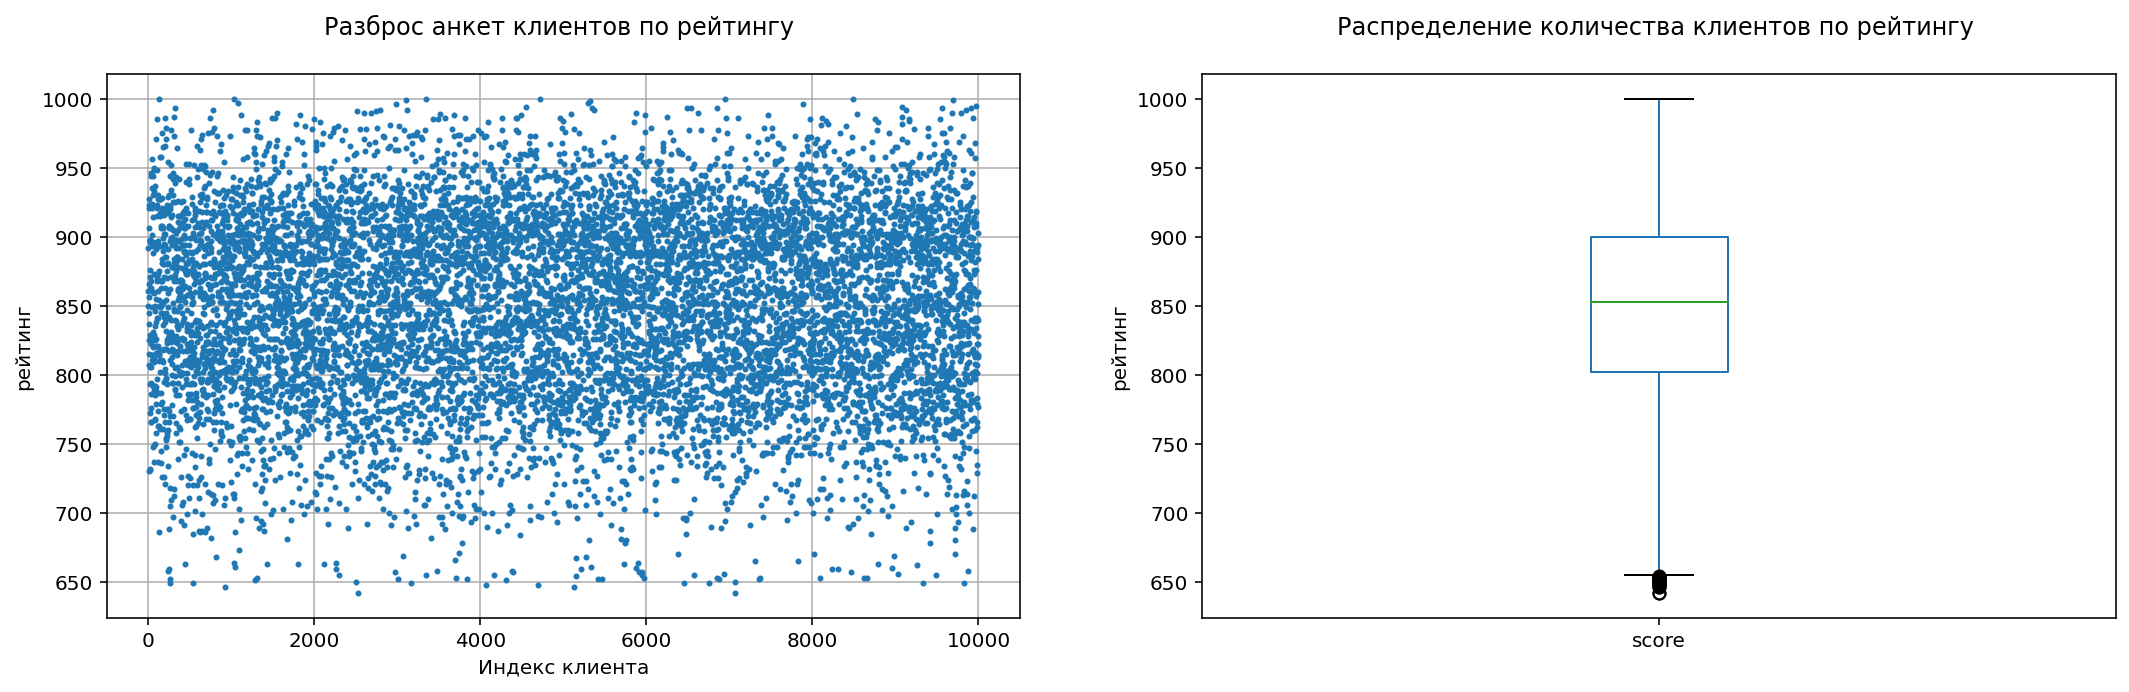

In [23]:
analyse('score', 'рейтинг', 'рейтингу')

 - Рассмотрим распределение значений возраста клиентов.

Статистисческие параметры данных


count    10000.000000
mean        42.727300
std         12.164922
min         18.000000
25%         33.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: age, dtype: float64

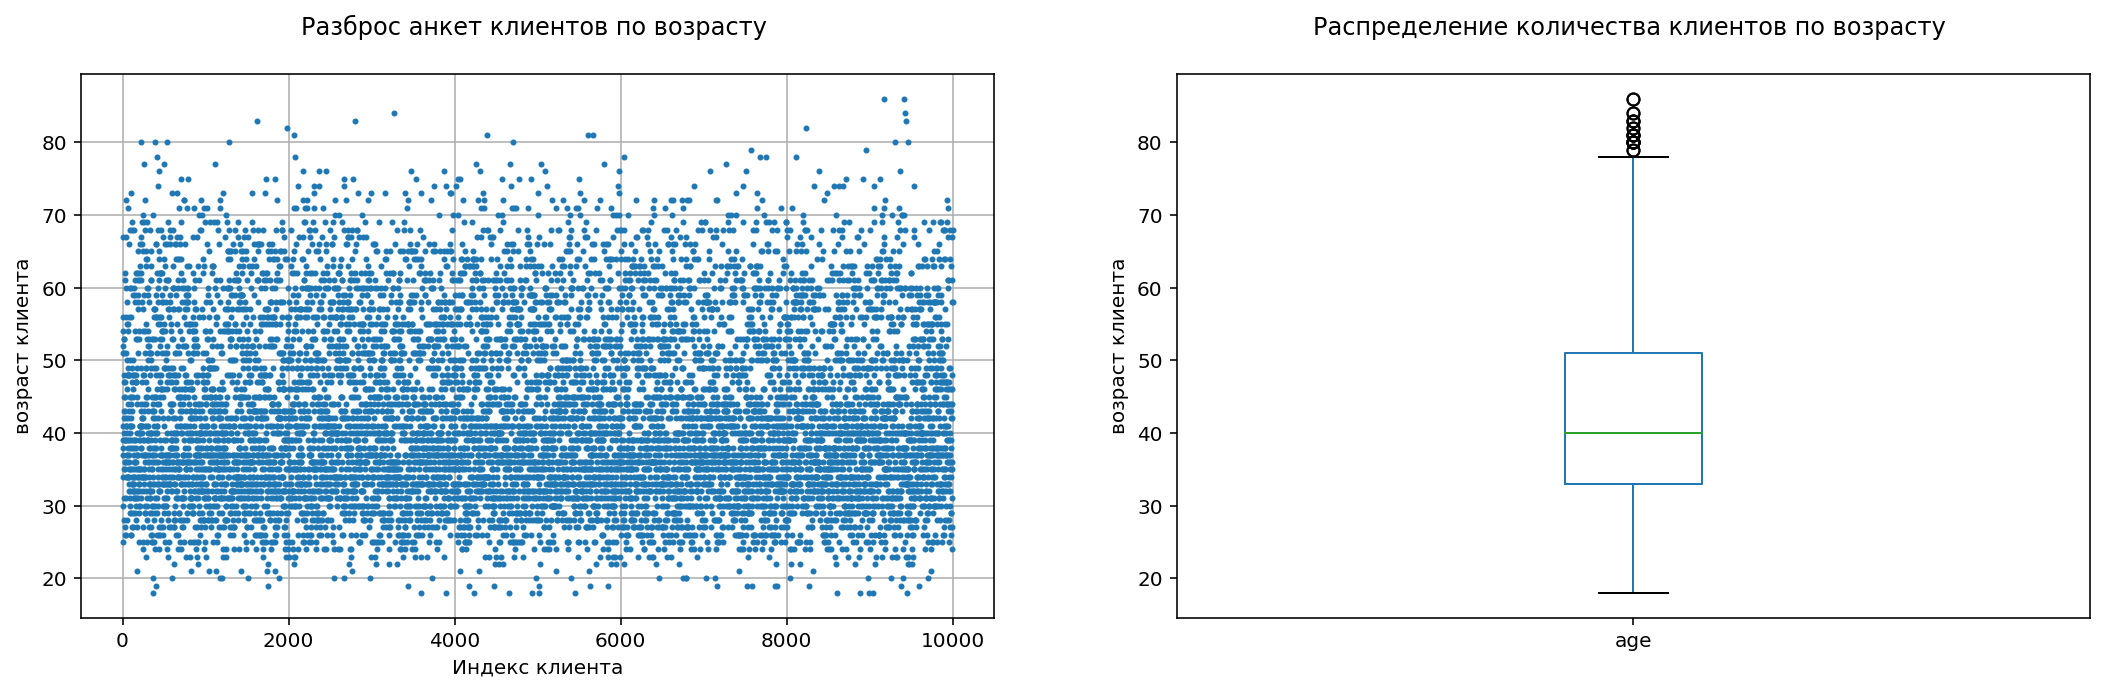

In [24]:
analyse('age', 'возраст клиента', 'возрасту')

In [25]:
print('Количество клиентов старше 78 лет равно %.f,' %len(data[data['age']>78]), 
     'что составляет %.2f%%' %round(100*len(data[data['age']>78])/len(data), 2))

Количество клиентов старше 78 лет равно 22, что составляет 0.22%


In [26]:
data = data.loc[data['age']<=78]

Выбросы в области больших значений можно удалить, так как они единичны и не значимы.

 - Рассмотрим столбец с оценкой количества собственности на распределение данных.

Статистисческие параметры данных


count    9978.000000
mean        2.629084
std         1.981680
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64

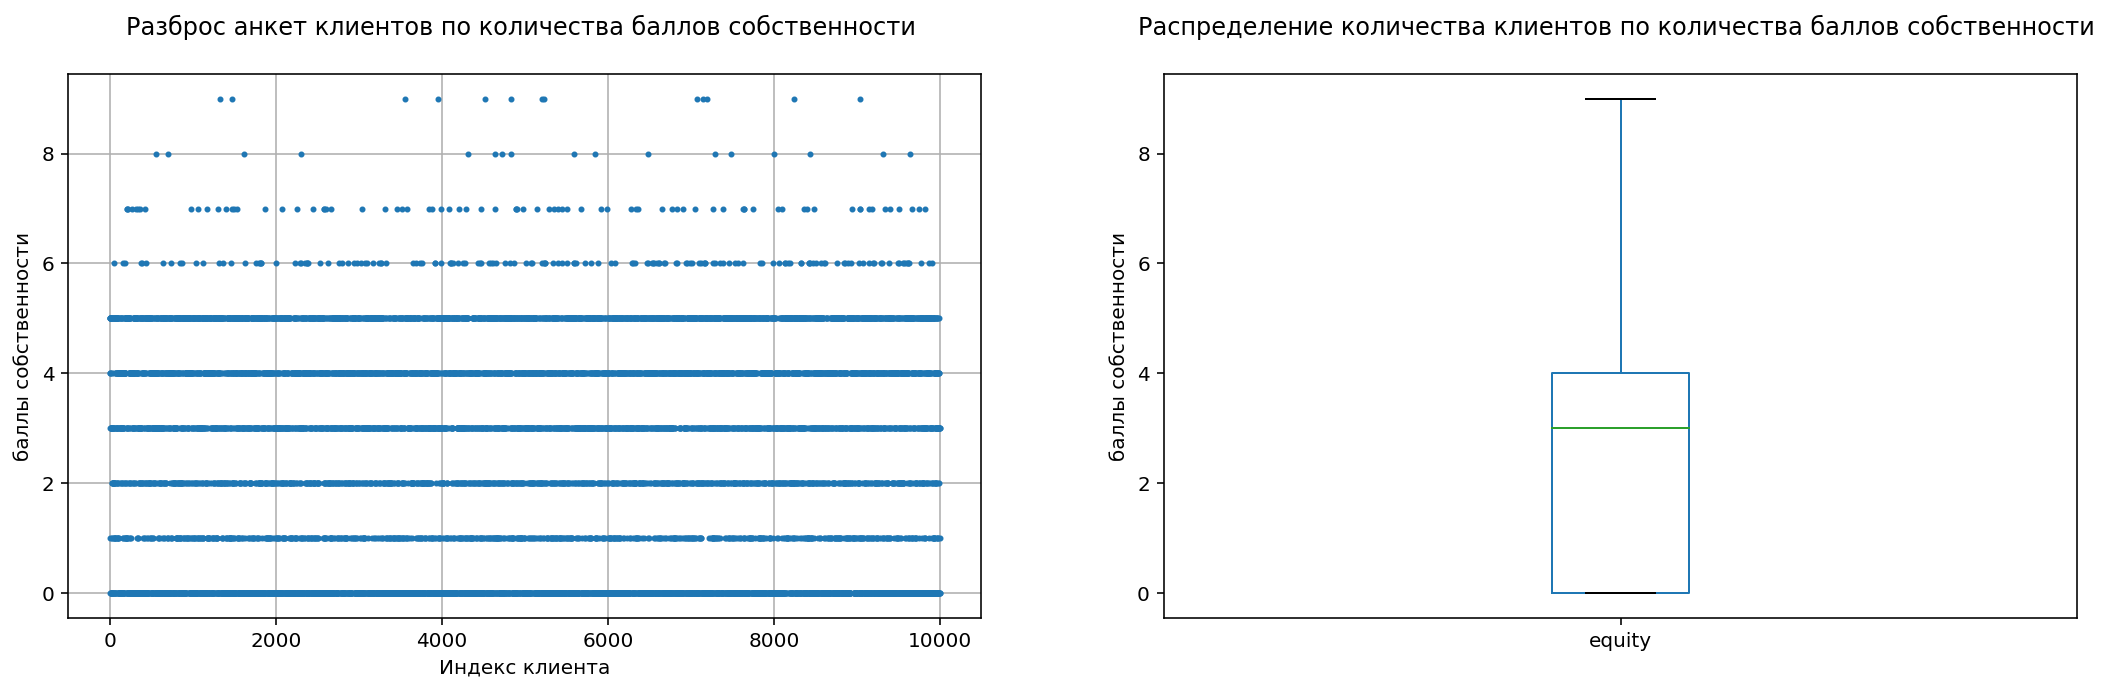

In [27]:
analyse('equity', 'баллы собственности', 'количества баллов собственности')

Данные о клиентах с 6 и более количеством объектов собственности малочисленны, однако удалять их не стоит, так как будет интересно оценить вероятность оттока среди таких клиентов. На этапе рассмотрений гипотез можно объединить данные 5 и более объектов в одну категорию и рассмотреть как отдельный премиум сегмент.

 - Рассмотрим данные о количестве используемых продуктов банка.

Статистисческие параметры данных


count    9978.000000
mean        1.870716
std         0.792570
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64

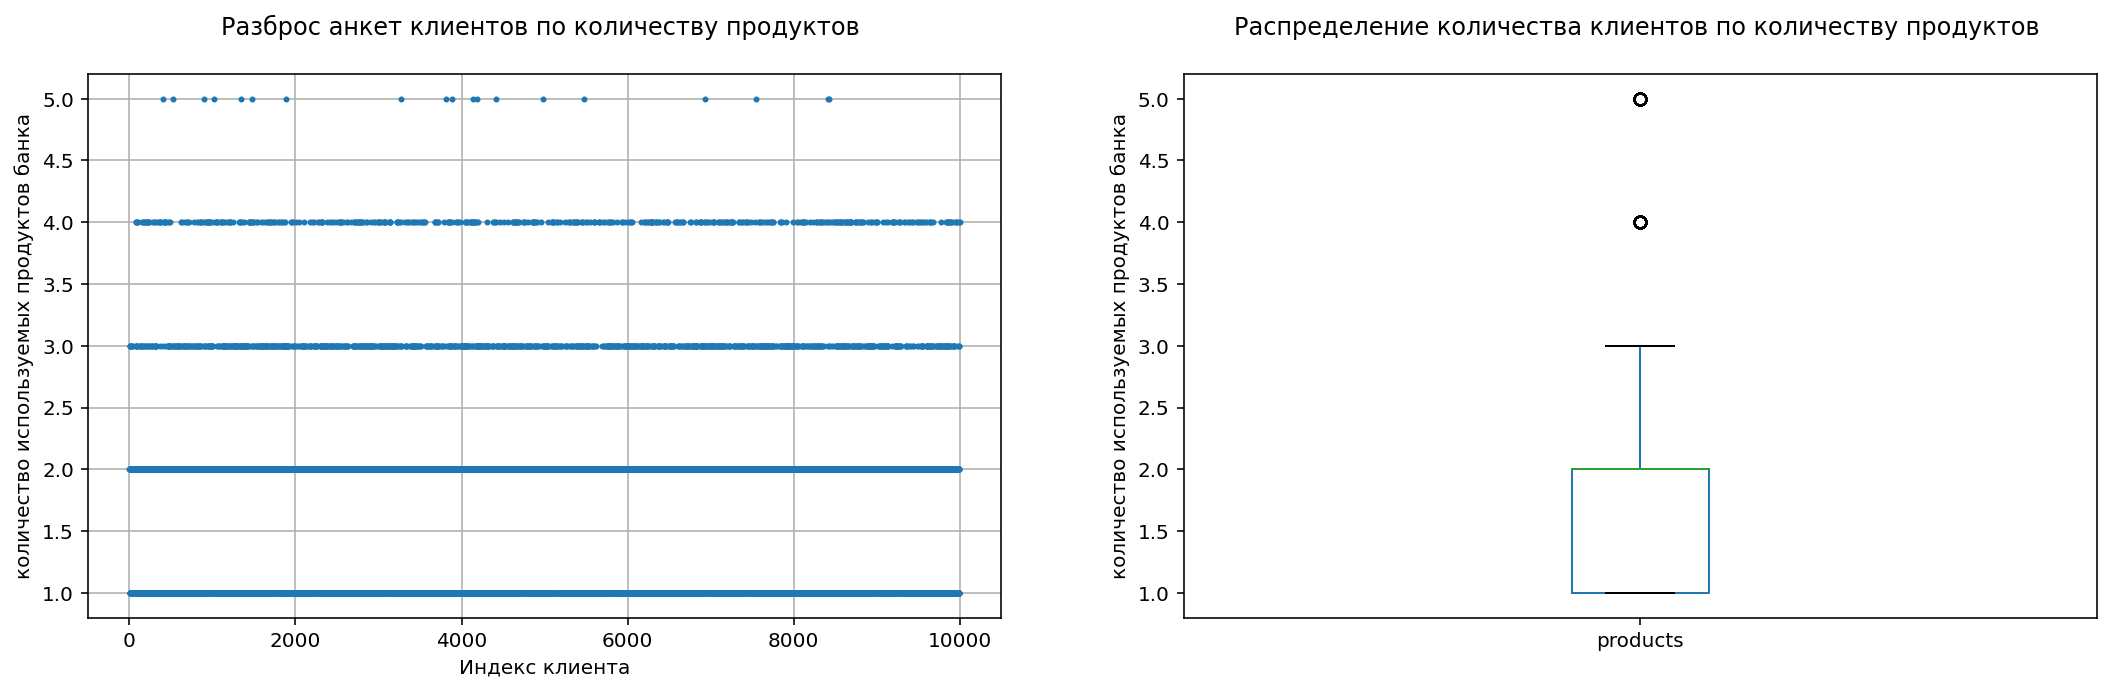

In [28]:
analyse('products', 'количество используемых продуктов банка', 'количеству продуктов')

Значения в 5 используемых продуктов банка очень редки, однако их можно не удалять, чтобы рассмотреть динамику влияния большого количества продуктов на отток. Нам достоверно не известно, как именно происходил подсчёт количества продуктов и какие категории входят в него, поэтому при наличии у клиента дебетового, накопительного и кредитного счёта, а так же страховки, вполне возможно использование инвестиционных продуктов или ипотеки. 

На этапеисследовательского анализа необходимо оценить, одинаков ли отток среди клиентов с 1-2 продуктами и клиентов с 3-5 продуктами. 



 - Рассмотрим распределение значений в столбце оценочного дохода, который в отличие от столбца баланса не содержит пропуски.

Статистисческие параметры данных


count    9.978000e+03
mean     1.479892e+05
std      1.394265e+05
min      2.546300e+03
25%      7.537646e+04
50%      1.197961e+05
75%      1.746796e+05
max      1.395064e+06
Name: est_salary, dtype: float64

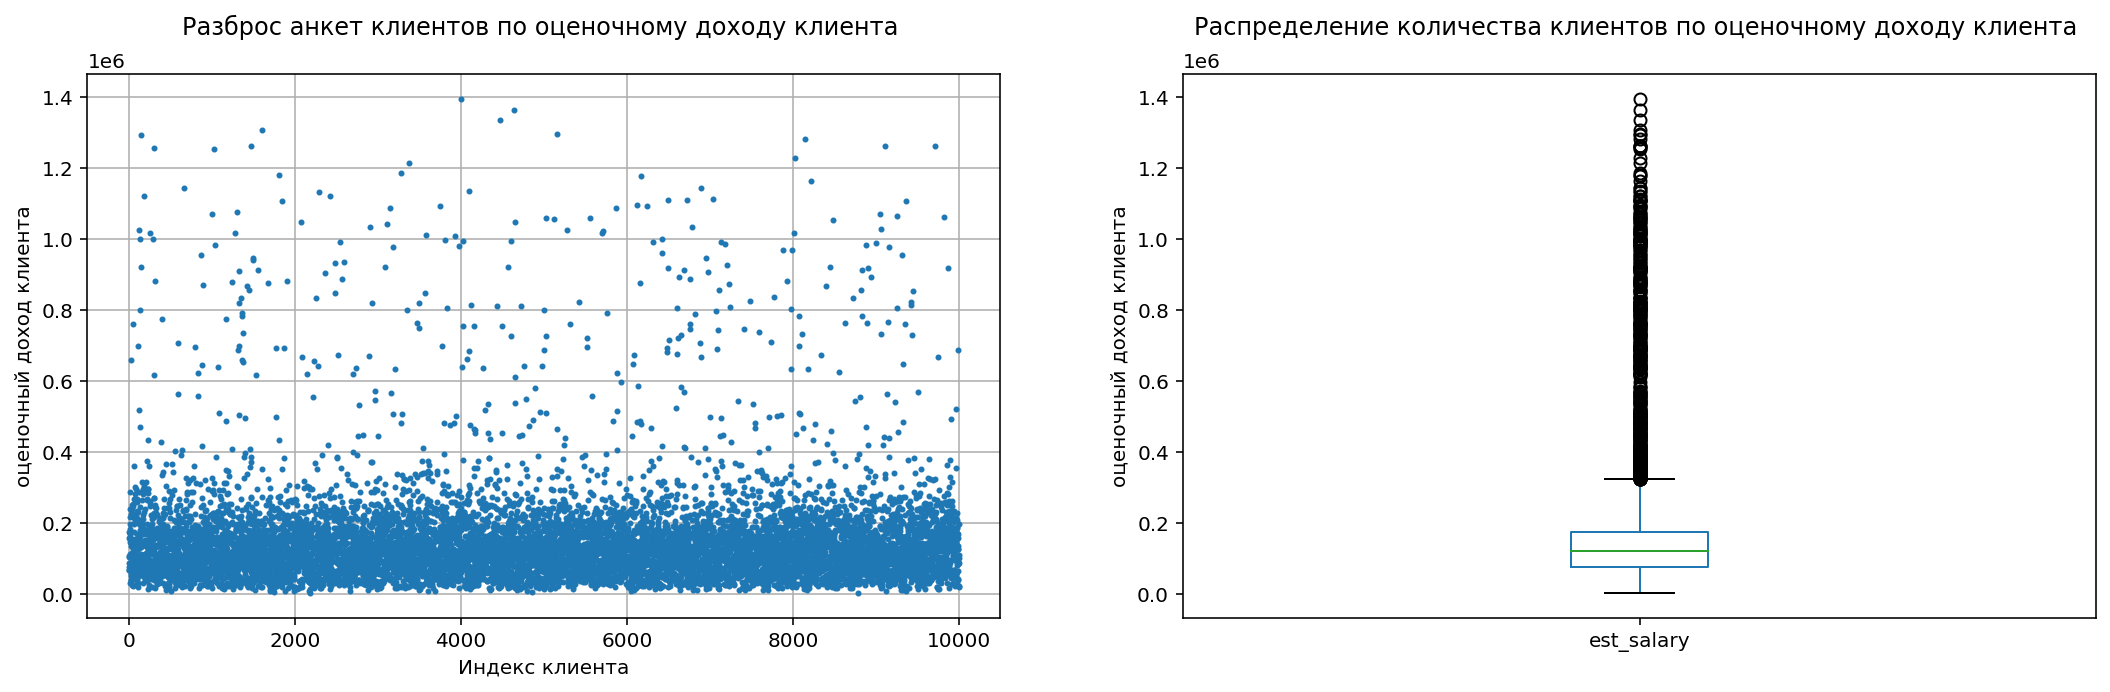

In [29]:
analyse('est_salary', 'оценочный доход клиента', 'оценочному доходу клиента')

Величина оценочного дохода имеет существенный хвост выбросов в области больших значений. Однако удаление анкет этих клиентов может исказить или смазать оценку оттока клиентов премиум-сегмента.

 - Наиболее сложный для рассмотрения столбец и синформацией о балансе, так как он содержит много отсутствующих значений и наверняка выбросы, возникающие из-за разного уровня дохода клиентов.

Статистисческие параметры данных


count    7.690000e+03
mean     8.281173e+05
std      1.982457e+06
min      0.000000e+00
25%      2.953670e+05
50%      5.242251e+05
75%      9.803785e+05
max      1.191136e+08
Name: balance, dtype: float64

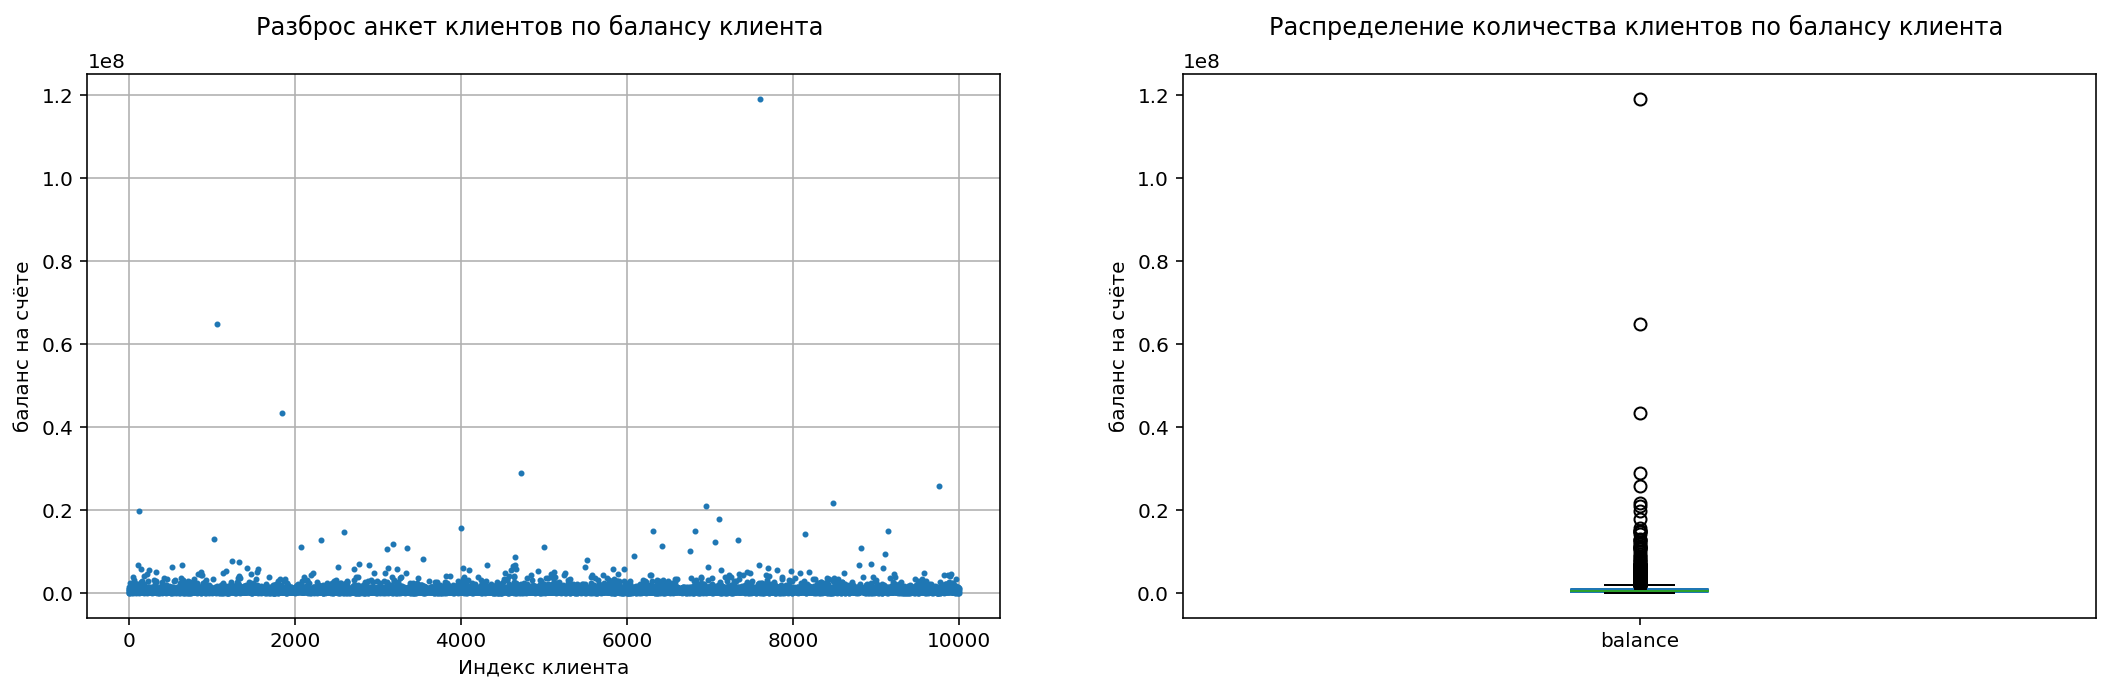

In [30]:
analyse('balance', 'баланс на счёте', 'балансу клиента')

Выбросы в области больших значений, характерные для клиентов с очень большим достатком или получившим кредит для крупной покупки, очень смещают основную массу значений влево. Подсчитаем, сколько клиентов выбивается из рамок статистического анализа.

In [31]:
print('Общее количество удаленных данных равно %.f,' %(10000 - len(data)), 
     'что составляет %.2f%%' %round(100*(10000 - len(data))/10000, 2))

Общее количество удаленных данных равно 22, что составляет 0.22%


На этапе проверки наличия выбросов критические значения были обнаружены почти во всех столбцах. 
- В столбцах с количеством баллов собственности и количеством используемых продуктов,  баланса и оценочного дохода экстреммумы решено не удалять, так как они кажутся объяснимыми. 
- Удалены данные очень большого возраста клиента.
- Общее количество потерь данных составило 22 анкеты, что менее 1% и не должно существенно исказить картину имеющихся зависимостей.

### Создание новых столбцов

Для удобства оценки корреляции признаков следует закодировать пол и город клиента.

Общий альтернативный подход называется унитарным кодированием (One Hot Encoding). Основная стратегия состоит в том, чтобы преобразовать значение каждой категории в новый столбец и присвоить столбцу значение 1 или 0 (Истина / Ложь). Это дает преимущество в том, что значение не взвешивается неправильно при дальнейшемизучении корреляции, но имеет недостаток в виде добавления дополнительных столбцов в набор данных. В случае не очень большого количества данных и категорий, добавление новых столбцов не существенно утяжелит таблицу, но может помочь в оценке характеристик клиента для сегментации.

In [32]:
# воспользуемся функцией унитарного кодирования для каждого категорийного столбца последовательно:
data['city_2']=data['city']
data['gender_2']=data['gender']
data = pd.get_dummies(data, columns=['city_2'])
data = pd.get_dummies(data, columns=['gender_2'])
# оценим результат:
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль,gender_2_Ж,gender_2_М
0,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,1,0,1,0
1,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,1,0,1,0
2,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,0,1,0,1,0
3,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,0,1,1,0
4,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,0,1,0,1


In [33]:
# изменим названия столбцов:
data = data.rename (columns = {'city_2_Ростов':'rostov', 
                               'city_2_Рыбинск':'rybinsk',
                               'city_2_Ярославль':'jaroslavl',
                               'gender_2_Ж':'female',
                               'gender_2_М':'male'
                              })
# оценим результат:
data.head(20)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,jaroslavl,female,male
0,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,1,0,1,0
1,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,1,0,1,0
2,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,0,1,0,1,0
3,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,0,1,1,0
4,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,0,1,0,1
5,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,0,1,0,0,1
6,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,0,0,1,1,0
7,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,0,0,1,1,0
8,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,0,0,1,0,1
9,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,0,0,1,1,0


**Выводы**

На этапе предварительной обработки данных были исследованы все столбцы:

 - названия столбцов приведены к snake регистру;
 - проверка категорийных данных ошибок не выявила;
 - явных дубликатов не обнаружено;
 - проверка на скрытые дубликаты выявила повторы идентификационного номера клиента, возникшие скорее всего из-за слияния баз  данных трёх городов, поэтому столбец с идентификатором был удалён;
 - на этапе проверки пропусков были обнаружены неполные данные в столбцах возраста, которые было решено заменить на медианное значение, и в столбце баланса, которые было решено оставить без изменения, так как они не являются случайными, а выявить закономерность их появления в рамках данного анализа не представляется возможным;
 - на этапе проверки наличия выбросов критические значения были обнаружены почти во всех столбцах
 - встолбцах с количеством баллов собственности и количеством используемых продуктов, баланса и оценочного дохода экстреммумы решено не удалять;
 - удалены данные клиентов старше 78 лет;
 - общее количество потерь данных составило 22 анкеты, что менее 1% и не должно существенно исказить картину имеющихся зависимостей;
 - на этапе добавления столбцлв было решено закодировать города и пол для дальнейшей оценки корреляции между этими признаками и оттоком.

## Исследовательский анализ данных

Посмотрим, какова доля отточных клиентов в целом по банку.

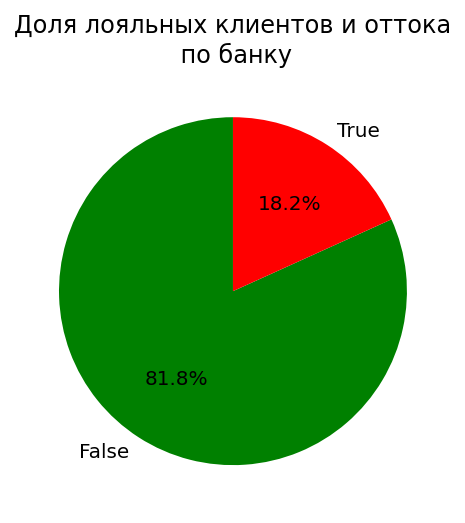

In [34]:
# сгруппируем данные столбца оттока и подсчитаем долю обоих вариантов:
plt.pie(data['churn'].value_counts(), 
        labels=data[column].value_counts().index, 
        autopct='%1.1f%%', 
        startangle = 90, 
        colors=['green', 'red'])
plt.title('Доля лояльных клиентов и оттока\n по банку')
plt.show()

### Оценка значимости характеристик клиента на отток

Оценим наиболее влияющие на отток параметры с помощью матрицы корреляции. Выделим из матрицы корреляции столбец оттока и визуализируем его значения, чтобы ранжировать значимость.

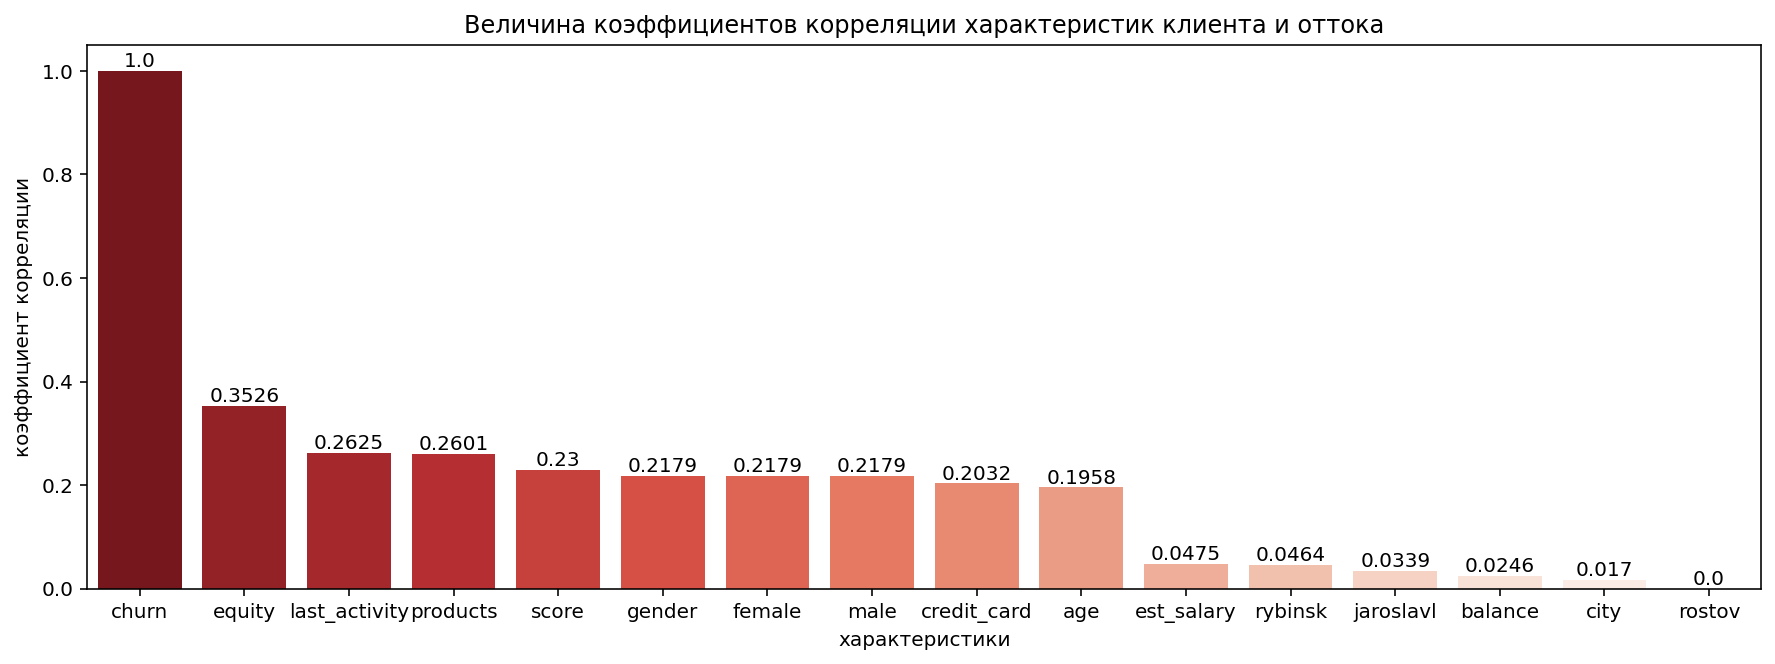

In [35]:
m = data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])[['churn']]
d = round(m, 4).sort_values(by='churn', ascending=False)

plt.figure(figsize=(15, 5))
ax1 = sns.barplot(data=d, x=d.index, y='churn', palette=sns.color_palette("Reds_r",15))
for p in ax1.patches:
        height = p.get_height()
        plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height),
                 ha="center", va="bottom")
ax1.set_ylabel('коэффициент корреляции')
ax1.set_xlabel('характеристики')
ax1.set_title('Величина коэффициентов корреляции характеристик клиента и оттока')
plt.show()

Наибольшее влияние выделяется у тех параметров, коэффициент корреляции которых стремится к 1. 

В случае имеющихся данных низкими коэффициенты характеризуются зависимости баланса, города проживания и прогнозируемого дохода. По шкале Чеддока перечисленные параметры не имеют влияния на отток, так как их k меньше 0,1 и рассматривать их как часть характеристик портрета отточного клиента не обязательно. 

Такие характеристики как возраст, наличие кредитной карты, пол, рейтинг, количество используемых продуктов и активность клиента имеют чуть большее влияние - слабое по шкале Чеддока (от 0,1 до 0,3).  Их следует включить в условия сегментации. Интересно отметить, что влияние пола оказалось одинаковым.

Наибольшее влияние имеет параметр балла количества собственности - умеренное по Чеддоку (от 0,3 до 0,5). Этот параметр следует рассматривать в первую очередь.

- Исследуем столбцы с характеристиками клиентов по-отдельности и выделим наиболее чувствительные категории и диапазоны.

Для исследование категорийных признаков поспользуемся долевой оценкой оттока и количественным распределением значений.

In [36]:
#создадим функцию, которая:
def rate_analyse(column, x_name, description_name):
# выведет три графика - круговую диаграмму с долями категорий характеристики, столбчатую с долями оттока
# и количественную столбчатую с разделением по оттоку
    colors = sns.color_palette(['orange', 'grey', 'brown', 'pink', 'yellow'])
    plt.figure(figsize=(10, 5))
    # создаст круговую диаграмму долей количества категорий в характеристике:
    plt.pie(data[column].value_counts(),
            labels=data[column].value_counts().index,
            autopct='%1.1f%%', 
            #startangle = 90, 
            colors=colors)
    plt.title(f'Распределение количества клиентов\n в общей базе данных по {description_name}')
    
    # создаст свобную таблицу для выделения долей оттока:
    rate_data = data.pivot_table(index=column, values='churn', aggfunc=['count','sum'])
    rate_data.columns = rate_data.columns.droplevel(level=1)
    rate_data['rate'] = round(rate_data['sum']/rate_data['count']*100, 2)
    rate_data[column]=rate_data.index
    rate_data = rate_data.sort_values(by='count', ascending = False)
    # создаст и выведет столбчатую диаграмму долей оттока по категориям характеристики:
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    ax1 = sns.barplot(data=rate_data, x=column, y='rate', ci=None, palette=colors, order=rate_data.index)
    # ограничит оси для удобства
    y_lim = round(max(rate_data['rate'])*1.2)
    plt.ylim(0, y_lim)
    for p in ax1.patches:
        height = p.get_height()
        plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height),
                 ha="center", va="bottom")
    # добавит линию уровня оттока по банку для выявления отточных параметров характеристики:
    total_rate = round(100*len(data[data['churn']==True])/len(data), 2)
    plt.axhline(y=total_rate, color='b', linestyle = '--', label='уровень оттока по банку')
    plt.legend()
    plt.title(f'Доля оттока по {description_name}')
    plt.xlabel(x_name)
    plt.ylabel('Доля склонных к оттоку')
    
    # отбирёт из базы данные по интересующему столбцу и столбцу "churn" и считает количество клиентов:
    af = (data.groupby([column, 'churn'], as_index=False)
              .agg(count_object=(column, 'count'))
              .sort_values('count_object', ascending = False)
         )
    # создаст столбчатую диаграмму количества клиентов с выбранной характеристикой и учётом оттока:
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.barplot(x=column, y='count_object', hue='churn', data=af, palette=['green', 'red'])
    ax2.set_xticklabels(ax2.get_xticklabels())
    ax2.set_ylabel('Количество клиентов')
    ax2.set_xlabel(x_name)
    ax2.legend(title='отток')    
    ax2.set_title(f'Количество отточных и оставшихся клиентов\n по {description_name}')
    for p in ax2.patches:
        height = p.get_height()
        plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height),
                 ha="center", va="bottom")
    plt.show()


Рассмотрим каждый категорийный столбец с помощью написанной функции и построенных ею графиков.

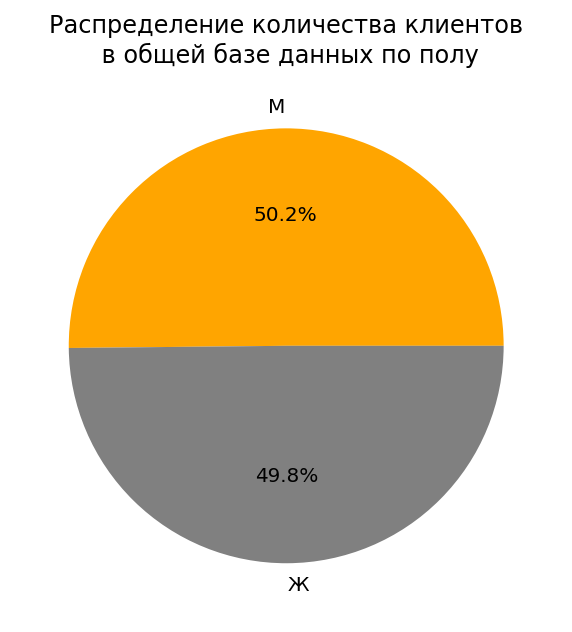

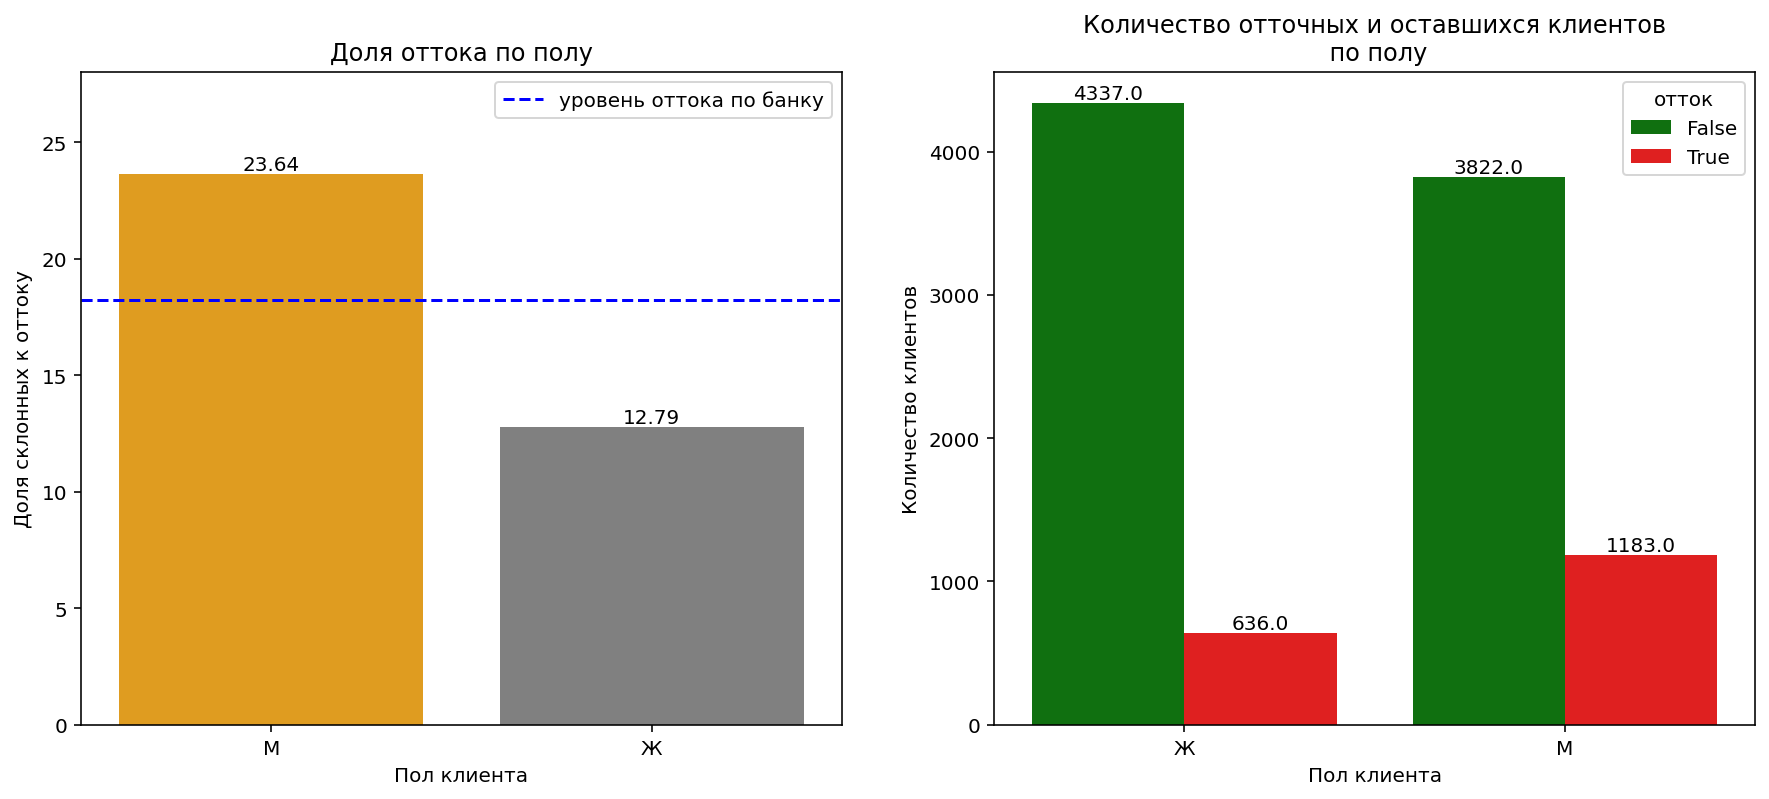

In [37]:
rate_analyse('gender', 'Пол клиента', 'полу')

Несмотря на то, что количество мужчин и женщин примерно равнов базе данных, среди мужчин отток более активен.

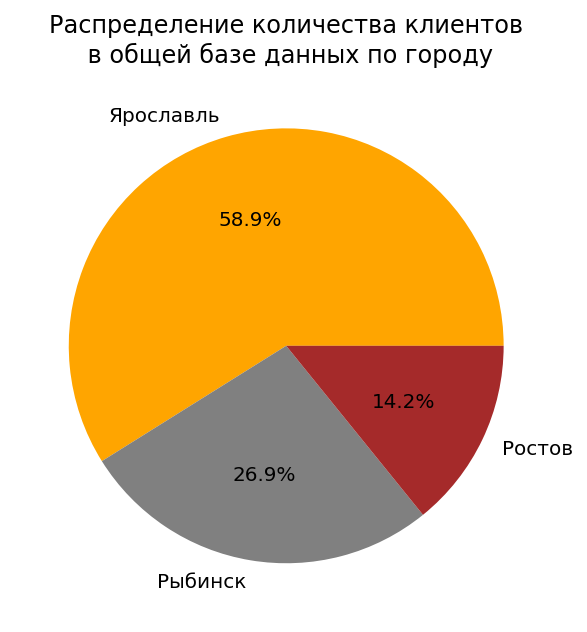

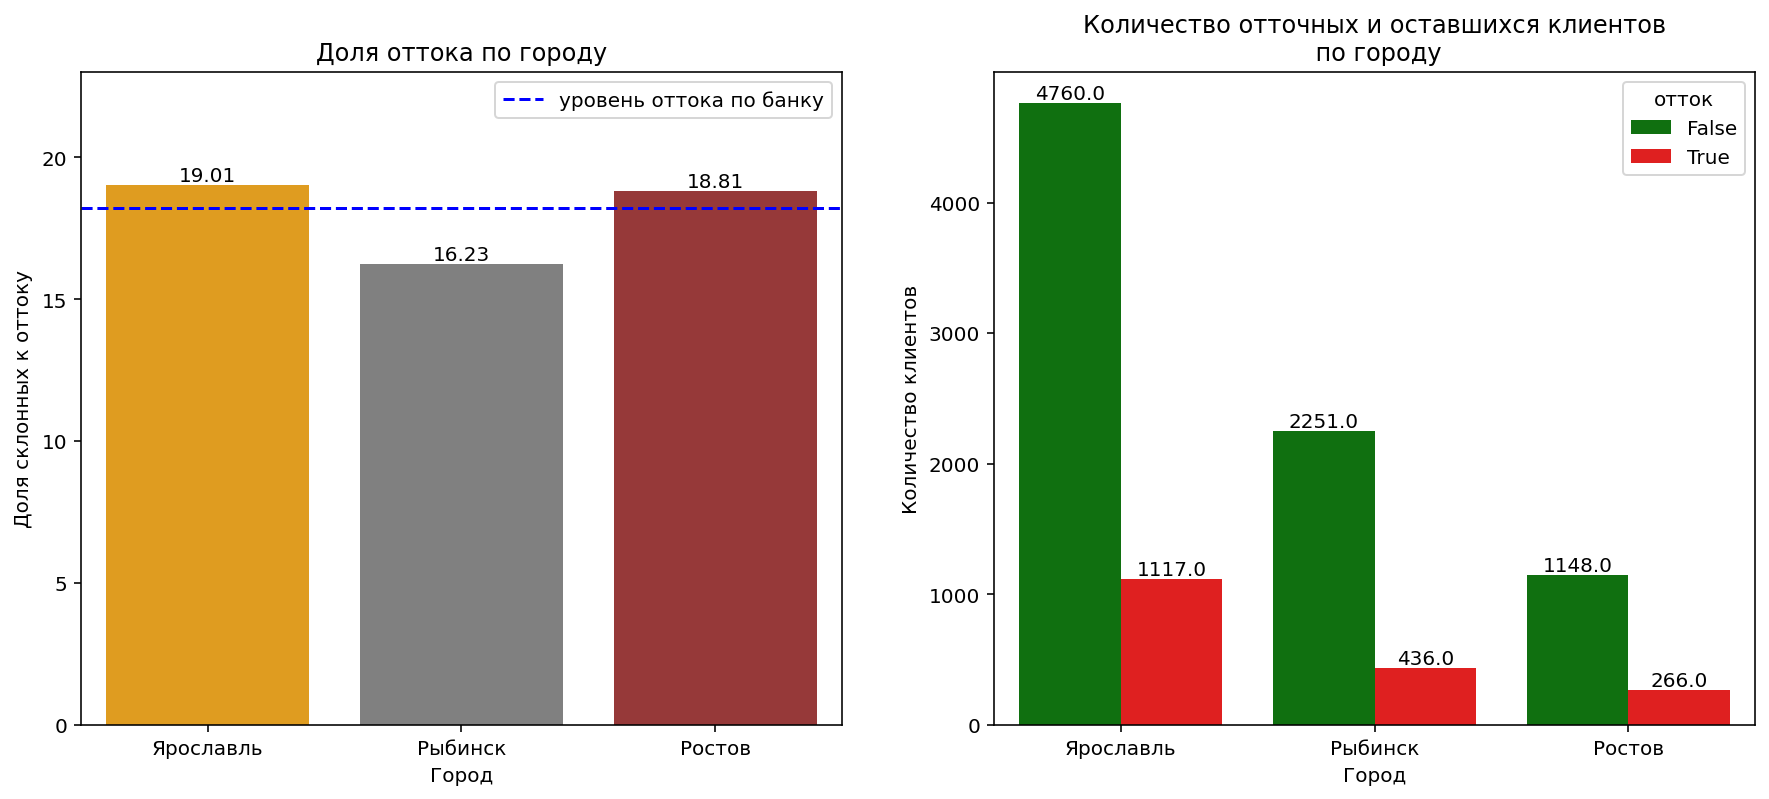

In [38]:
rate_analyse('city', 'Город', 'городу')

Распределение долей количества клиентов соответствует численности населения представленных городов. Интересно отметить, что несмотря на наименьшее количество клиентов из Ростова, доля оттока там наблюдается выше среднего значения по базе, как и в лидере по количеству клиентов - Ярославле. Однако колебания доли отоока во всех городах очень близкое к среднему значению,а корреляционный коэффициент Пирсона достаточно низкий, чтобы не принимать эту характеристику в список значимх для оттока.

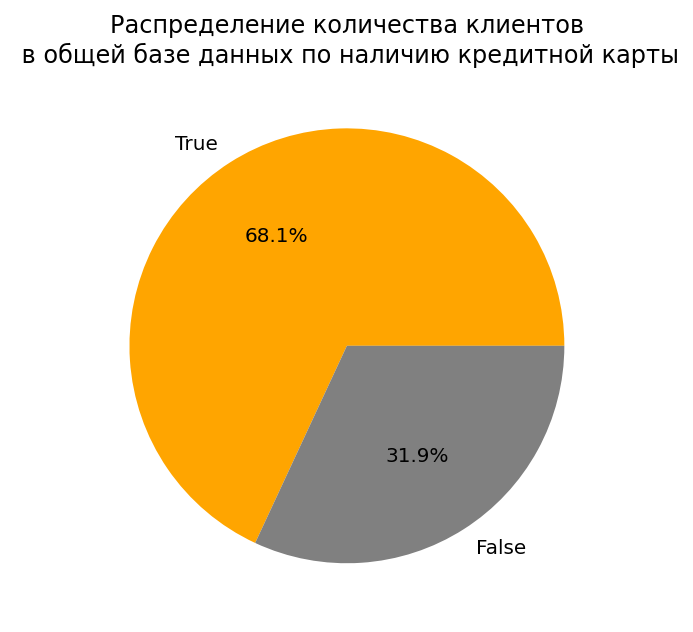

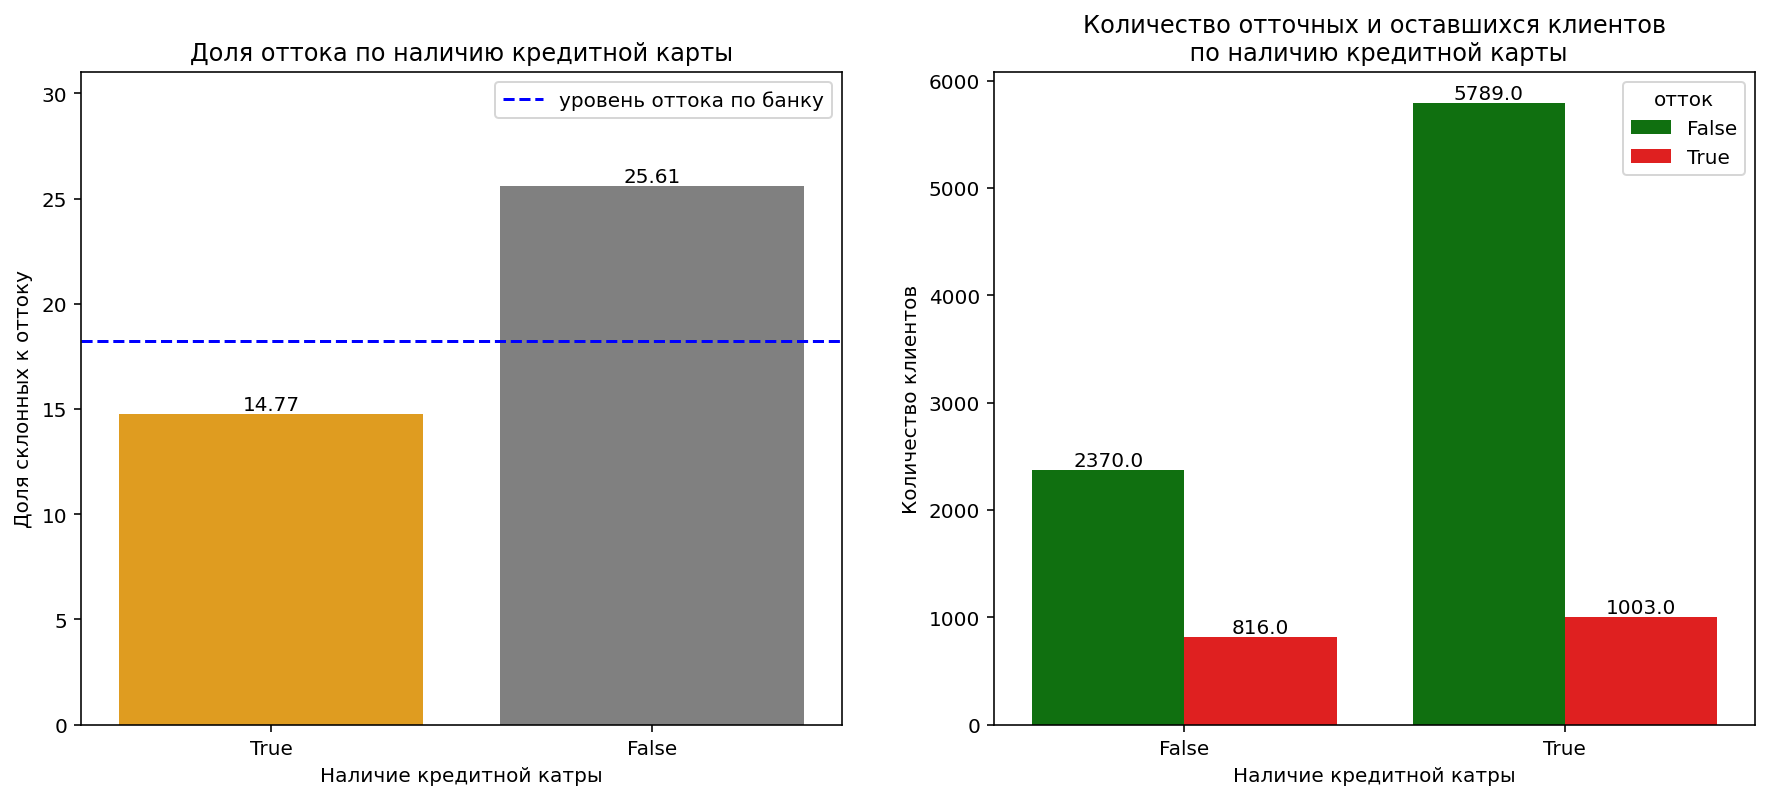

In [39]:
rate_analyse('credit_card', 'Наличие кредитной катры', 'наличию кредитной карты')

Клиентов с кредитными картами больше, чем клиентов без кредитных карт в два раза.
Клиенты с кредитными картами реже уходят в отток. Это объясняется расширением финансовых возможностей клиента и необходимостью им выполнять долгосрочные обязательства.

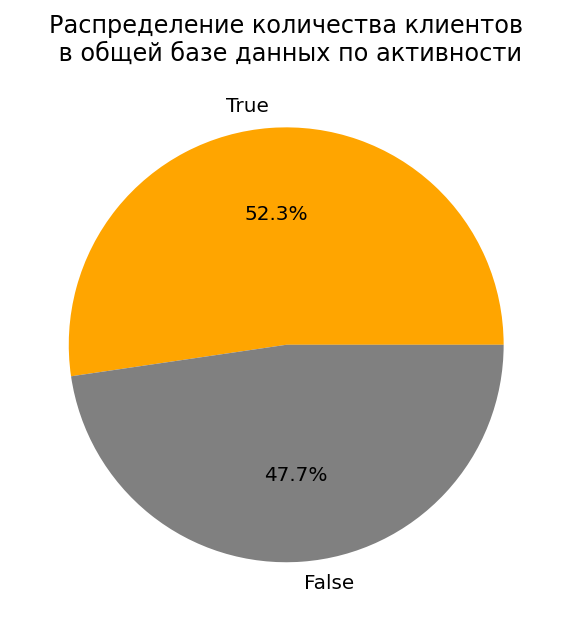

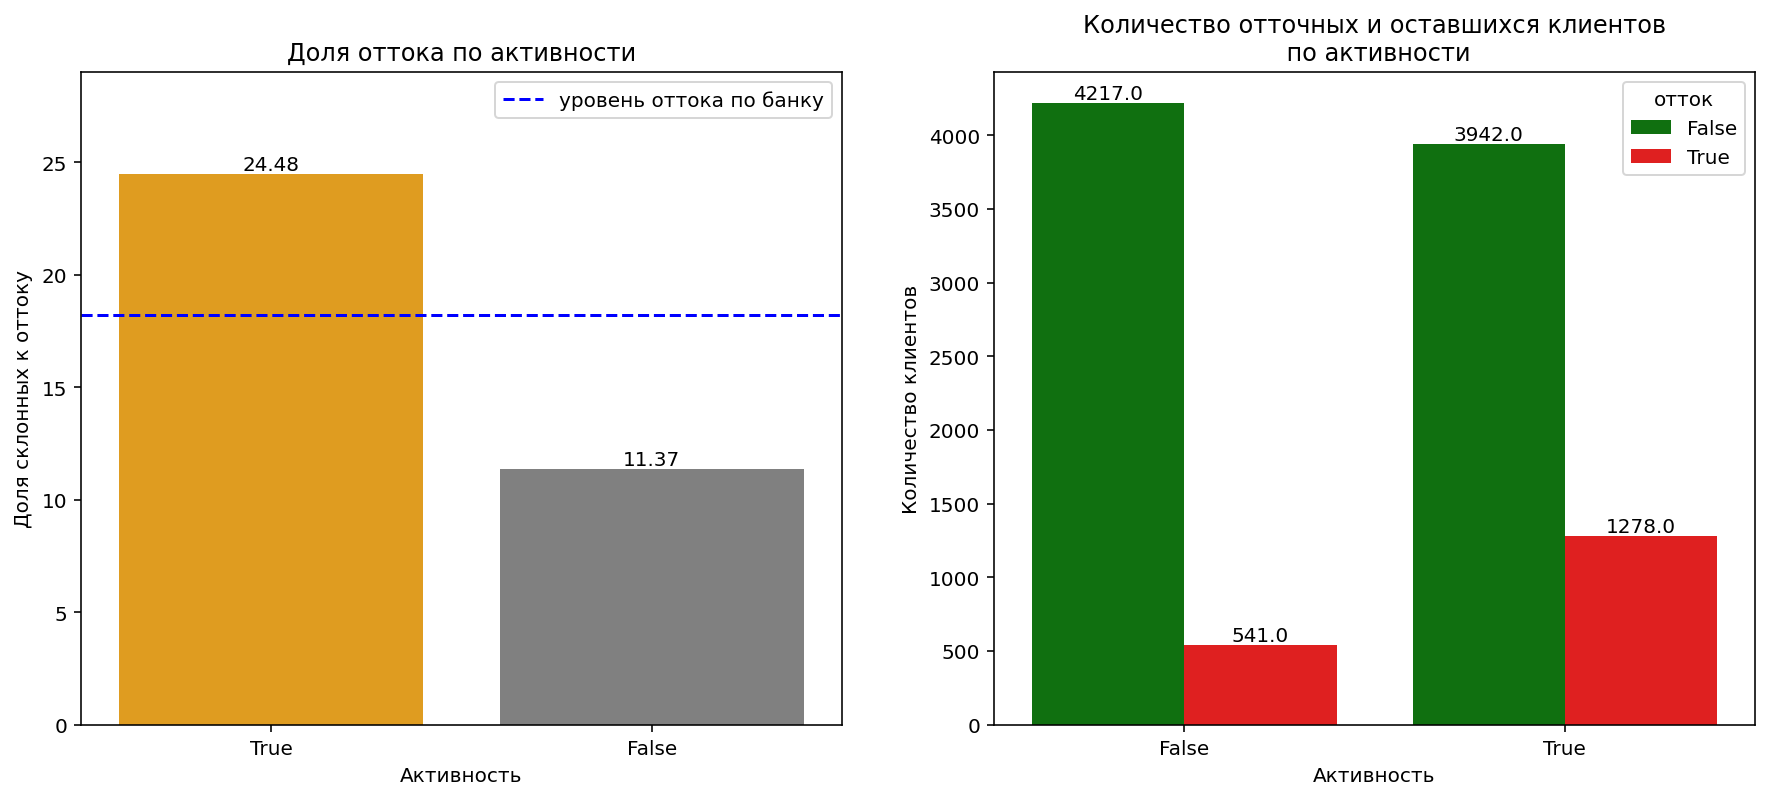

In [40]:
rate_analyse('last_activity', 'Активность', 'активности')

Активных и неактивных клиентов почти одинаковое количество, однако среди активных клиентов отток фиксируется в два раза больший и выше среднего по банку. Это может объясняться тем, что деятельность активных клиентов заметнее, чем неактивных, которые "пассивно" пользуются банковскими продуктами, например имеют подарочную кредитную или дебетовую карту, но не расплачиваются ей.

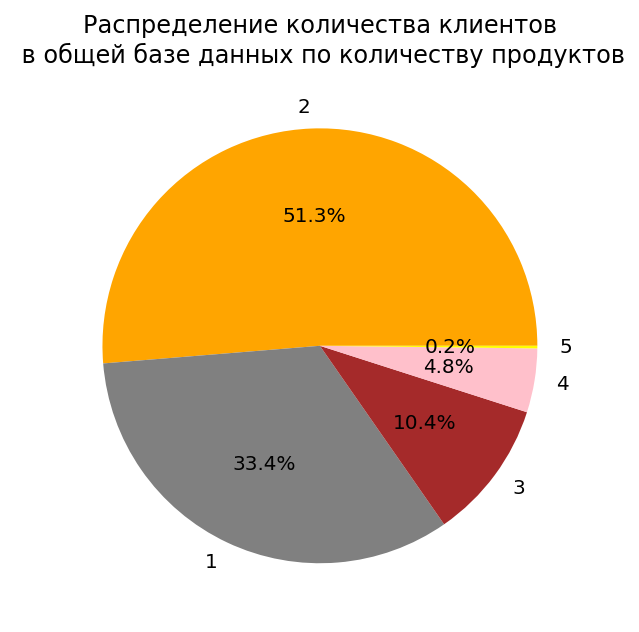

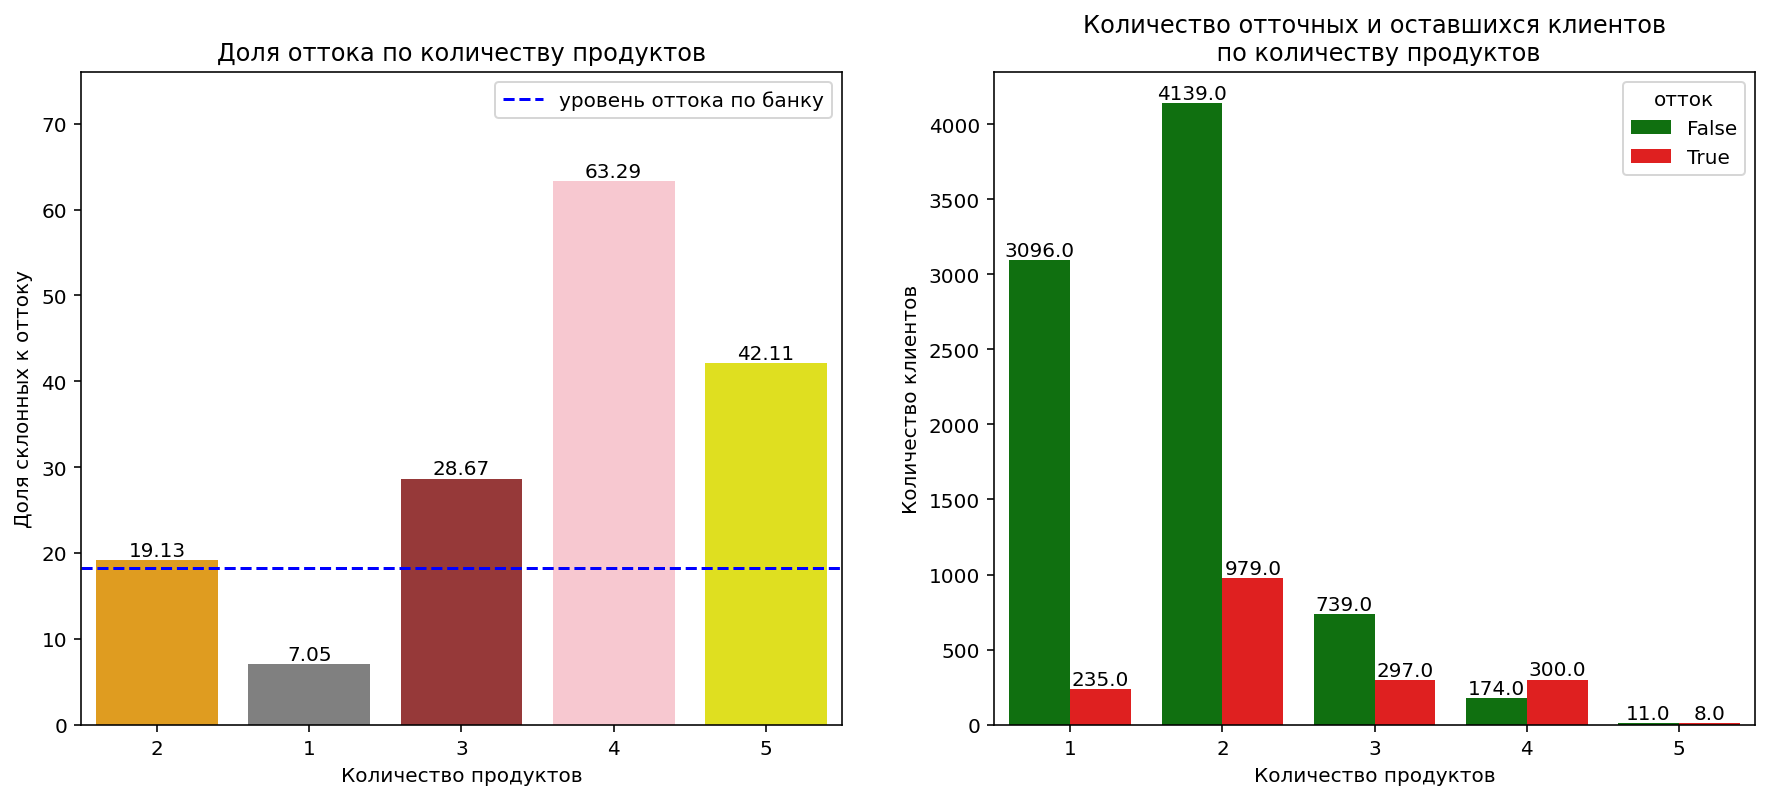

In [41]:
rate_analyse('products', 'Количество продуктов', 'количеству продуктов')

Большинство клиентов имеют 2 или 1 продукт из банковских услуг. Меньше всего можно отметить клиентов с 5, 4 и 3 продуктами, однако именно среди них наибольший процент оттока. Это может объясняться их малочисленностью и поэтому чувствительностью к долевому расчёту.

In [42]:
def hist_analyse(column, x_name, description_name):
    bins = int(max(data[column]) - min(data[column])) +1
    if bins <100:
        bins = bins
    else:
        bins = 100
# построим две гистограммы на одном графике:
    palette = ['green', 'red']
    sns.histplot(data, x=column, hue="churn", stat="density", common_norm=False, element="step", bins=bins, palette=palette)
    
# уточним параметры графиков:
    plt.xlabel(x_name)
    plt.ylabel('Количество клиентов')
    plt.title('Распределение количества клиентов \n по ' + description_name)
    plt.legend(['ушли', 'остались'])

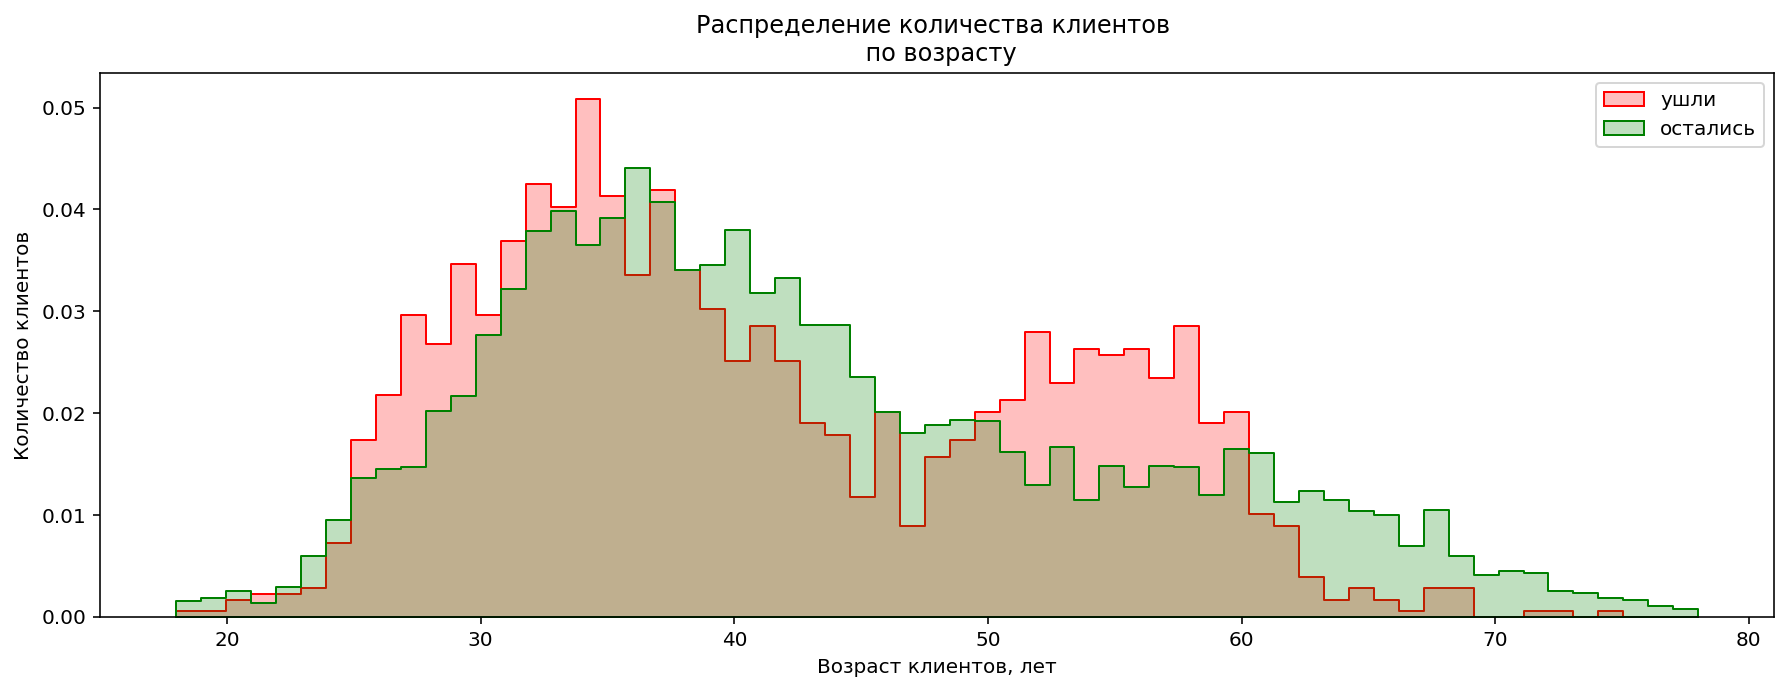

In [43]:
fig, axs = plt.subplots(figsize=(15, 5))
hist_analyse('age', 
             'Возраст клиентов, лет', 
             'возрасту')
plt.show()

Интервалы возраста склонных к оттоку клиентов - 25-35 лет и 50-60. Наиболее стабильны клиенты 40-50 лет лет и 62+.

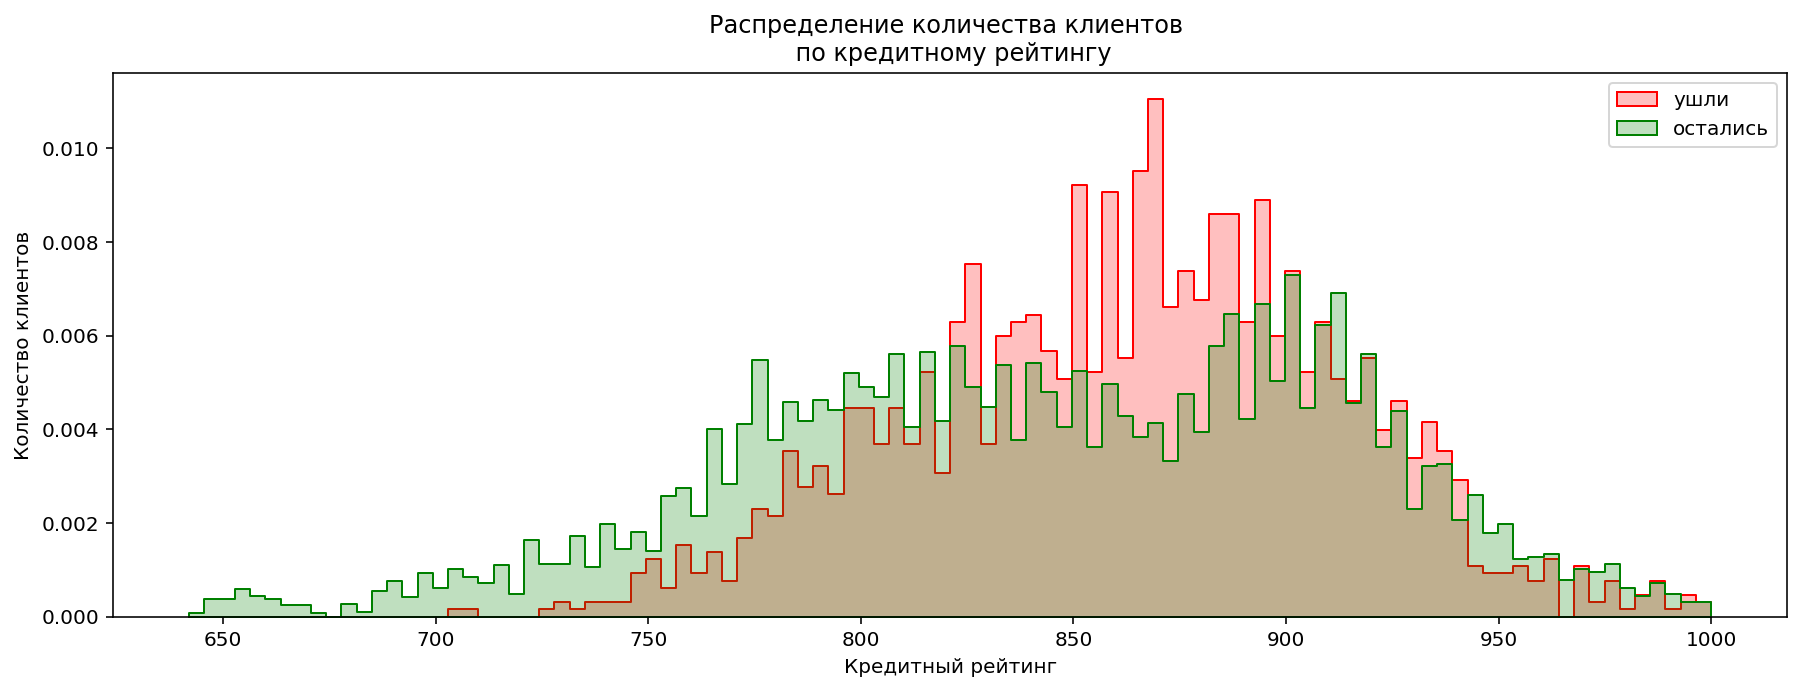

In [44]:
fig, axs = plt.subplots(figsize=(15, 5))
hist_analyse('score', 
             'Кредитный рейтинг', 
             'кредитному рейтингу')
plt.show()

Клиенты с кредитным ретингом от 830 до 890 больше всего подвержены оттоку. Также часто уходят клиенты с рейтингом около 930-940  Наиболее стабильны клиенты с низким рейтингом до 800 и более 940.

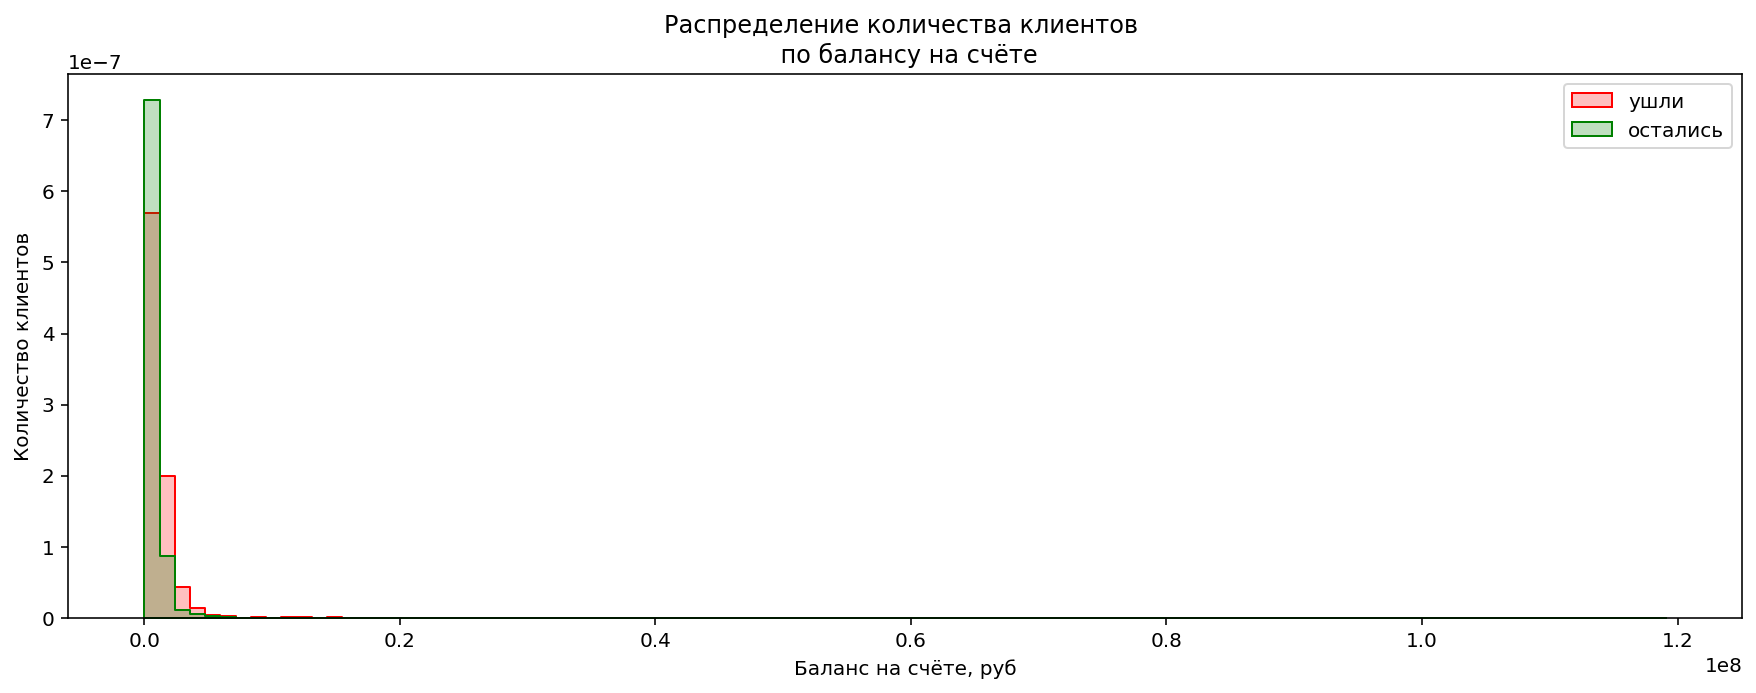

In [45]:
fig, axs = plt.subplots(figsize=(15, 5))

hist_analyse('balance', 
             'Баланс на счёте, руб', 
             'балансу на счёте')
xlim=[0, 200000]
plt.show()

График отягощён большими выбросами, поэтому рассмотрим попроговые значения, сократив ось баланса.

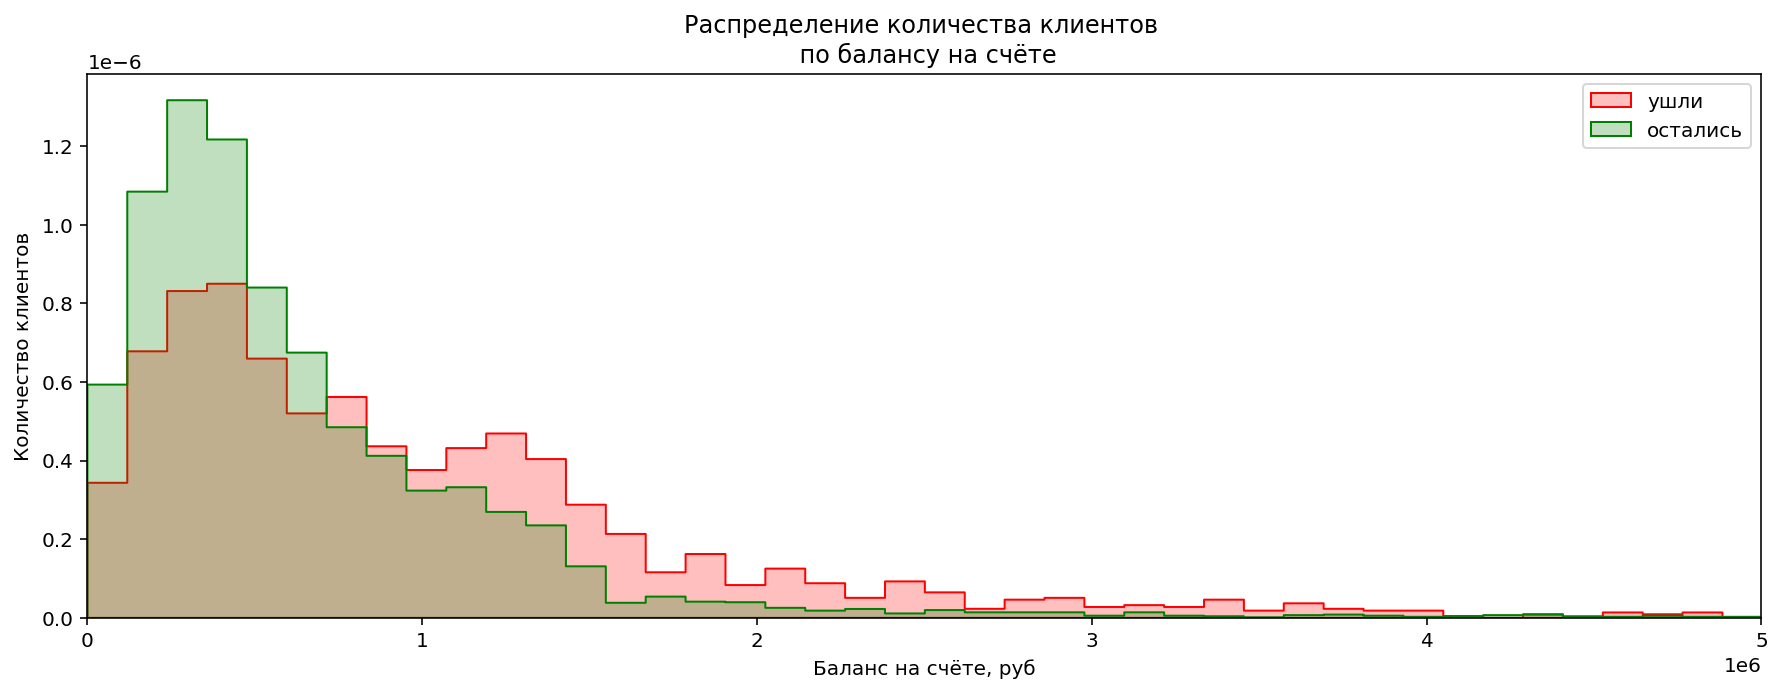

In [46]:
fig, axs = plt.subplots(figsize=(15, 5))

palette = ['green', 'red']
sns.histplot(data, x='balance', hue="churn", stat="density", common_norm=False, element="step", bins=1000, palette=palette,)
plt.xlim(0, 5000000)
plt.xlabel('Баланс на счёте, руб')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества клиентов \n по балансу на счёте')
plt.legend(['ушли', 'остались'])
plt.show()

Клиенты с балансом более 1 млн руб очень подвержены оттоку. Наиболее стабильны клиенты с балансом до 800 тыс руб.

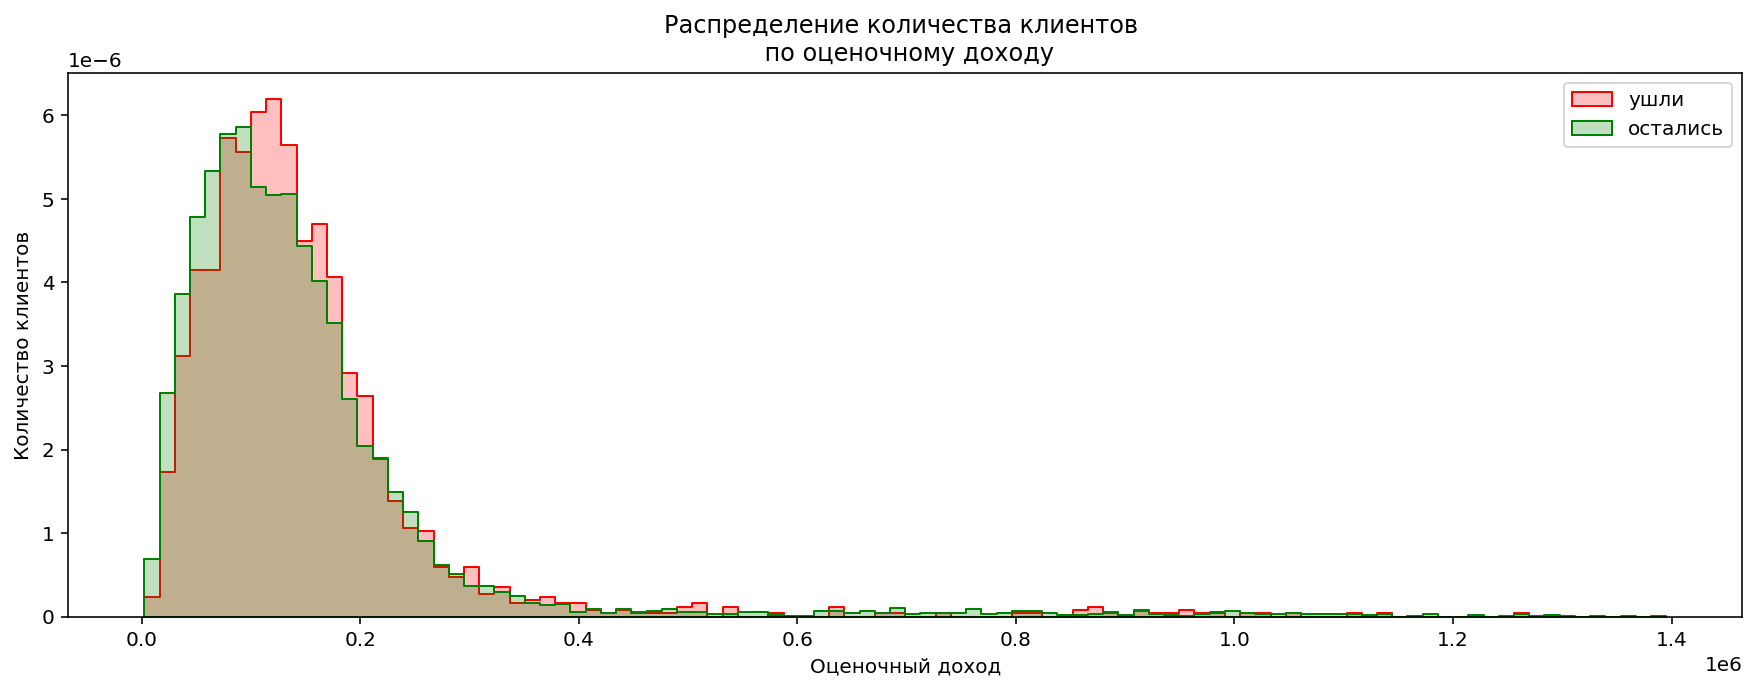

In [47]:
fig, axs = plt.subplots(figsize=(15, 5))
hist_analyse('est_salary', 
             'Оценочный доход', 
             'оценочному доходу')
plt.show()

С точки зрения оценочного дохода в отток могут уйти скорее клиенты, получающие более 100 тыс. С Клиентами до этого порога отток чуть менее вероятен.

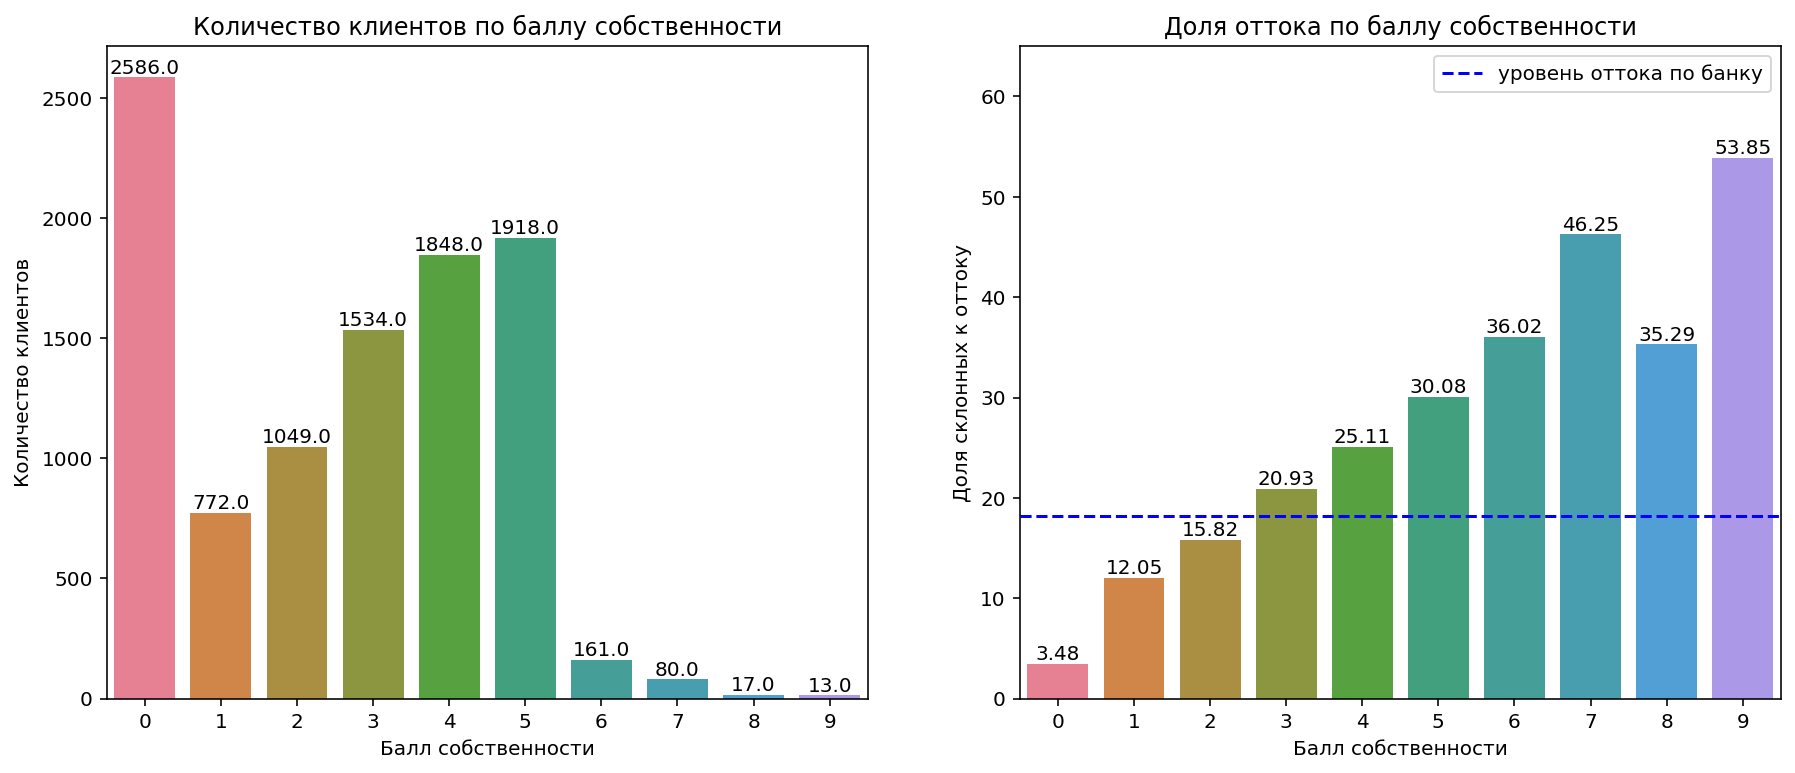

In [48]:
rate_equity = data.groupby('equity').agg(total_count=('churn', 'count'), churn_count=('churn', 'sum'))
rate_equity['rate'] = round(100*rate_equity['churn_count']/rate_equity['total_count'], 2)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
ax1 = sns.barplot(data=rate_equity, x=rate_equity.index, y='rate', ci=None, order=rate_equity.index,
                 palette = sns.color_palette("husl", 12))
    # ограничит оси для удобства
y_lim = round(max(rate_equity['rate'])*1.2)
plt.ylim(0, y_lim)
for p in ax1.patches:
    height = p.get_height()
    plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height),
            ha="center", va="bottom")
    # добавит линию уровня оттока по банку для выявления отточных параметров характеристики:
total_rate = round(100*len(data[data['churn']==True])/len(data), 2)
plt.axhline(y=total_rate, color='b', linestyle = '--', label='уровень оттока по банку')
plt.legend()
plt.title(f'Доля оттока по баллу собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Доля склонных к оттоку')

plt.subplot(1, 2, 1)

ax2 = sns.barplot(data=rate_equity, x=rate_equity.index, y='total_count', ci=None, order=rate_equity.index,
                 palette = sns.color_palette("husl", 12))
for p in ax2.patches:
    height = p.get_height()
    plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height),
            ha="center", va="bottom")
plt.title(f'Количество клиентов по баллу собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Количество клиентов')
plt.show()

Больше всего среди клиентов банка тех, у кого балл собственности 0. Среди остальных можно выделить так же многочисленные грутппы с 3, 4 и 5 баллами.
Клиенты с очень большим количеством собственности - 6 и более -  малочислены и скорее уходят в отток, чем клиенты с уровнем этого показателя менее 3. Доля оттока выше средней по банку наблюдается у клиентов с 3и более баллами собственности.

### Описание портрета клиента, склонного к оттоку.

In [49]:
churn_describe = data.groupby('churn').agg({'churn': 'count',
                                            'score' : 'median',
                                            'age': 'median',
                                            'products': 'mean',
                                            'credit_card': 'mean',
                                            'equity': 'mean',
                                            'last_activity': 'mean',
                                            'balance': 'median',
                                            'est_salary': 'median',
                                            'city': pd.Series.mode,
                                            'gender': pd.Series.mode
                                           }).rename(columns = {'churn':'count'}).T
churn_describe.columns = ['still', 'outflow']

churn_describe['s'] = churn_describe['still'].apply(lambda x: np.nan if isinstance(x, str) else x)
churn_describe['o'] = churn_describe['outflow'].apply(lambda x: np.nan if isinstance(x, str) else x)
churn_describe['rate'] = round(100*(1 - churn_describe['o']/churn_describe['s']), 2)
churn_describe = churn_describe[['still', 'outflow', 'rate']]

churn_describe.sort_values(by='rate', key=abs, ascending=False)

,still,outflow,rate
count,8159,1819,77.71
balance,475354.8,782410.47,-64.60
equity,2.376026,3.764156,-58.42
last_activity,0.483147,0.702584,-45.42
products,1.757813,2.37713,-35.23
credit_card,0.709523,0.551402,22.29
est_salary,118395.79,125395.22,-5.91
age,40,39,2.50
score,848,866,-2.12
city,Ярославль,Ярославль,NaN


При расмотрении средних тенденций с разделением клиентов на ушедших и оставшихся подверждаются сделанные ранее выводы о значимости таких характеристик, как баланс, количество баллов собственности, фактор активности, пола клиента, количества используемых продуктов и наличия кредитной карты в указанной последовательности. 

Незначащими оказались характеристики возраста, рейтинга и оценочного дохода клиента.

**Вывод**

Уровень оттока по банку установлен на отметке 18,23%.

*Портрет пользователя, склонного к оттоку:*
 - количество баллов собственности 3 и более;
 - активные;
 - пользующиеся 2, но скорее 3 и более продуктами;
 - с рейтингом от 830 до 890;
 - мужчины;
 - не имеющие кредитной карты,
 - возрастом от 25 до 35 лет или от 50 до 60;
 - с балансом более 1 млн руб;
 - с оценочным доходом более 100 тыс руб;
 - город - Ярославль.
 
*Портрет наиболее лояльного клиента:*
 - количество баллов собственности 1 или 2;
 - не активные;
 - пользующиеся одним, реже 2 продуктами;
 - с рейтингом до 800 и более 940;
 - женщины;
 - имеющие кредитную карту,
 - возрастом от 35 до 50 лет или старше 60;
 - с балансом менее 1 млн руб;
 - с оценочным доходом менее 100 тыс руб;
 - город Рыбинск.

## Проверка гипотез

Разделим данные на две группы по оттоку и уточним, какими статистическими методами проверки гипотез необходимо воспользоваться.

In [50]:
data_still = data.loc[data['churn']==False]
print('Количество данных об оставшихся клиентах', len(data_still))
data_outflow = data.loc[data['churn']==True]
print('Количество данных об ушедших клиентах', len(data_outflow))

Количество данных об оставшихся клиентах 8159
Количество данных об ушедших клиентах 1819


Критериями для корректного использования t-теста Стьюдента являются:
 - **независимость выборок** - это условие выполнено, так как данные об оттоке не зависят от данных об оставшихся клиентах;
 - **нормальность распределения** - на графиках распределения и в ящиках с усами для некоторых характеристик есть хвосты, что говорит о том, что распределение не нормально;
 - **равенство дисперсий и размера выборок** - размеры выборок существенно различаются, поэтому при проведении t-теста следует применить поправку Уэлча;
 - **отсутствие явных выбросов** - наиболее критичные выбросы были удалены, однако в большинстве данных они были оставлены.


Проведение исследования гипотез с помощью ttest не возможно. Следует выбрать непараметрический тест U-критерий Манна — Уитни.

In [51]:
def norm_analyse(column):
# проведём тест на соотвествие данных отточных клиентов нормальному распределению
    alpha = 0.05 
    shapiro_test_stat, p_value = st.shapiro(data_outflow[column])
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Распределение не нормально')
    else:
        print('Нормальное распределение')  

### Проверка гипотезы о разном оценочном доходе клиентов.

Параметр оценочного доходна не был включён в значимые характеристики оттока исходя из низкой корреляции, однако следует убелиться, что он действительно не влияет.

Сформулируем гипотезы:

**H0:** средний оценочный доход ушедших и оставшихся клиентов одинаков.

**H1:** средний оценочный доход ушедших и оставшихся клиентов разный.

Уровень значимости примем равным 0,05%.


p-значение:  0.0
Распределение не нормально


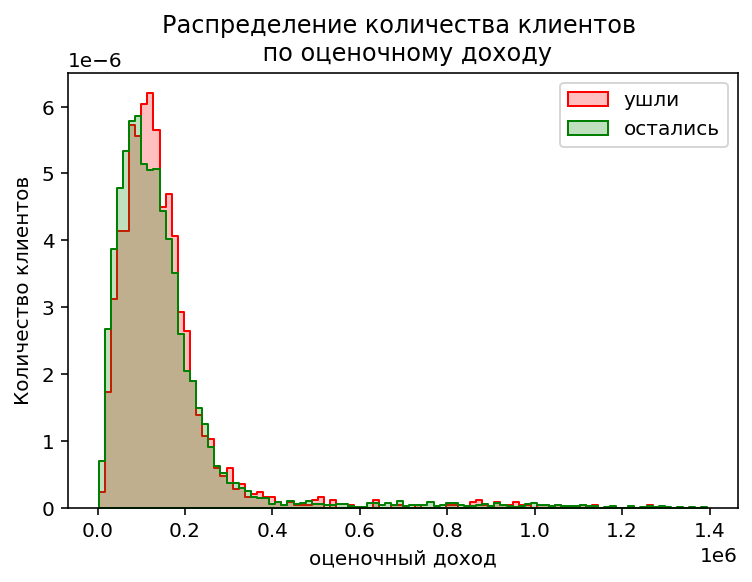

In [52]:
# проверим, можно ли применить ttest:
hist_analyse('est_salary', 'оценочный доход', 'оценочному доходу')
norm_analyse('est_salary')

Распределение не нормальное, имеется большое количество выбросов, размеры выборок сильно различаются. Следует выбрать непараметрический тест U-критерий Манна — Уитни.

In [53]:
# проведём тест:
results = st.mannwhitneyu(data_still['est_salary'],
                       data_outflow['est_salary'],
                       )
# выведем значение верояности ошибки:
print(f'p-value: {results.pvalue}')
# Проверяем p-value
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.00028172132718092127
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве оценочного дохода отвергнута. Скорее всего оценочный доход ушедших клиентов не равен оценочному доходу оставшихся.

### Проверка гипотезы о разнице возраста отточных и оставшихся клиентов.

Сформулируем гипотезы:

**H0:** средний возраст ушедших и оставшихся клиентов одинаков.

**H1:** средний возраст ушедших и оставшихся клиентов разный.

Уровень значимости примем равным 0,05%.


p-значение:  6.597515907375623e-24
Распределение не нормально


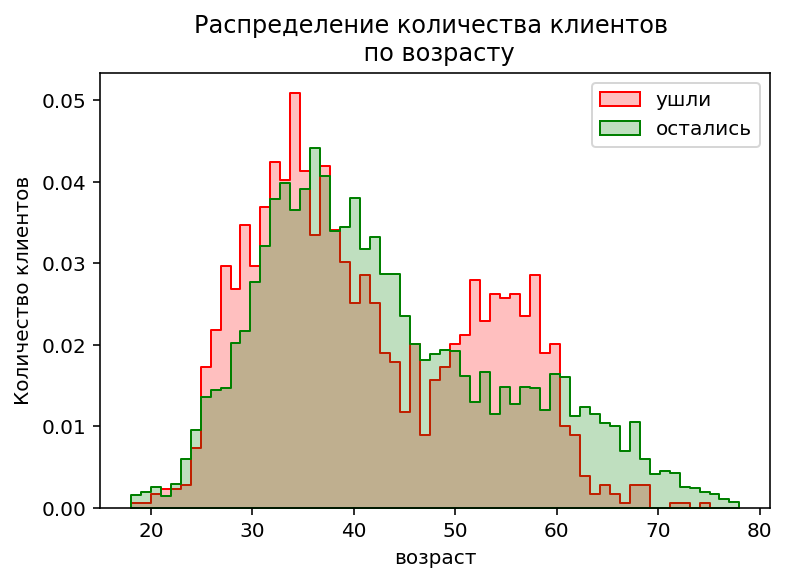

In [54]:
# проверим, можно ли применить ttest:
hist_analyse('age', 'возраст', 'возрасту')
norm_analyse('age')

Для применения ttest необходимо учесть условия:
- независимость выборок - имеющиеся выборки независимы;
- нормальность распределения - в случае столбца возраста данные распределены не нормально, однако ввиду больших выборок можно обратиться к ЦПТ ( если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности, даже если сама генеральная совокупность не распределена нормально);
- отсутствие выбросов - глобальные выбросы, способные повлиять на расперделение удалены в ходе подготовки данных;
- равенство дисперсий и размера выборок - размеры выборок существенно различаются, поэтому при проведении t-теста следует применить поправку Уэлча (equal_var=False).


In [55]:
# проведём тест:
results = st.ttest_ind(data_still['age'],
                       data_outflow['age'],
                       equal_var=False,
                       alternative='two-sided'
                      )
# выведем значение верояности ошибки:
print(f'p-value: {results.pvalue}')
# Проверяем p-value
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 4.892785719930282e-07
Отвергаем нулевую гипотезу


При выбранном уровне статистической значимости можно сказать, что средний возраст клиентов оттока и оставшихся статистически различим, поэтому этот признак следует включить в сегментацию.

### Проверка различия количества объектов в собственности у оставшихся и ушедших клиентов.

Сформулируем гипотезы:

**H0:** среднее значение количества собственности у ушедших и оставшихся клиентов одинаков.

**H1:** среднее значение количества собственности у ушедших клиентов больше, чем у оставшихся клиентов.

Уровень значимости примем равным 0,05%.

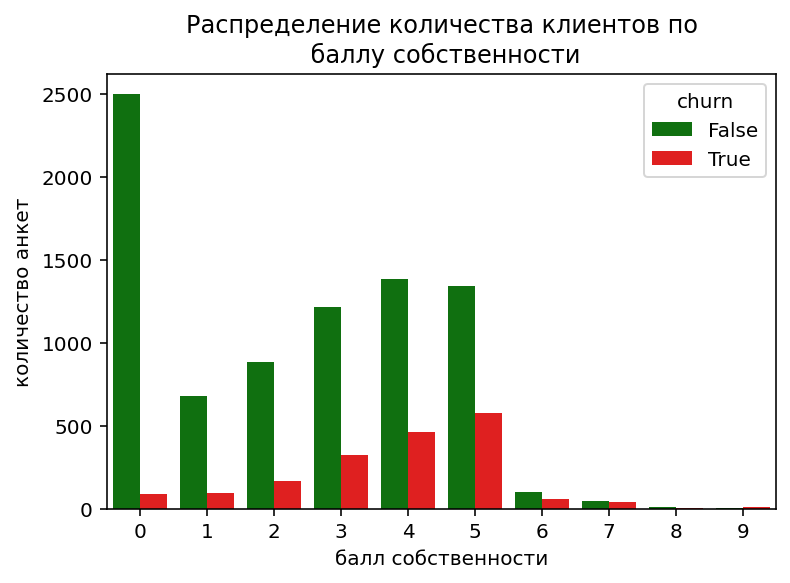

p-значение:  4.9976689635379296e-30
Распределение не нормально


In [56]:
# проверим, можно ли применить ttest:
sns.countplot(data=data, x='equity', hue='churn', palette=['green', 'red'])
plt.title('Распределение количества клиентов по\n баллу собственности')
plt.xlabel('балл собственности')
plt.ylabel('количество анкет')
plt.show()
norm_analyse('equity')

Не нормальное распределение, разница в количестве анкет в выборках и наиболее важное -  наличие выбросов, несмотря на независимость выборок и возможность применения ЦПТ благодаря наполненности выборок, не позволяют воспользоваться ttest, поэтому останемся в рамках непараметрического теста Манна—Уитни.

In [57]:
results = st.mannwhitneyu(data_still['equity'],
                       data_outflow['equity'],
                       alternative='greater')
# выведем значение верояности ошибки:
print(f'p-value: {results.pvalue}')
# Проверяем p-value
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


При выбранном уровне статистической значимости можно сказать, что среднее значение количества собственности у ушедших клиентов меньше или равно среднему значению количества собственности оставшихся клиентов.



###  Проверка различия количества используемых продуктов у оставшихся и ушедших клиентов.

Сформулируем гипотезы:

H0: среднее значение количества используемых продуктов у ушедших и оставшихся клиентов одинаков.

H1: среднее значение количества используемых продуктов у ушедших клиентов больше, чем у оставшихся клиентов.

Уровень значимости примем равным 0,05%.

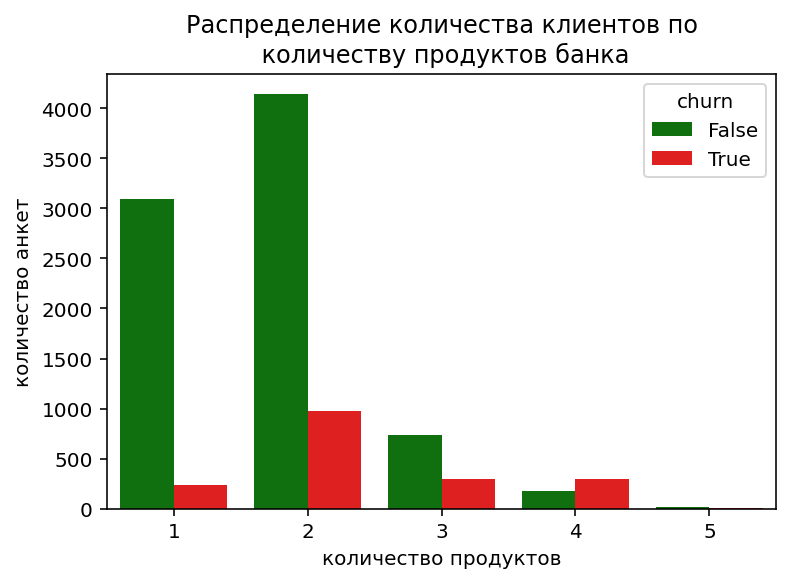

p-значение:  2.3481137977151662e-40
Распределение не нормально


In [58]:
# проверим, можно ли применить ttest:
sns.countplot(data=data, x='products', hue='churn', palette=['green', 'red'])
plt.title('Распределение количества клиентов по\n количеству продуктов банка')
plt.xlabel('количество продуктов')
plt.ylabel('количество анкет')
plt.show()

norm_analyse('products')

Существенная разница в количестве анкет в выборках, наличие выбросов в виде клиентов с 5 продуктами, распределение оставшихся клиентов не выглядит нормальным. Проводить проверку стоит с помощью U-критерия Манна-Уитмана.

In [59]:
results = st.mannwhitneyu(data_still['products'],
                       data_outflow['products'],
                       alternative='greater')
# выведем значение верояности ошибки:
print(f'p-value: {results.pvalue}')
# Проверяем p-value
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


**Выводы**

Проверка гипотез о различиях средних показателей характеристик клиентов подтвердила предыдущие выводы:

- Нулевая гипотеза о равенстве оценочного дохода отвергнута. Скорее всего оценочный доход ушедших клиентов не равен оценочному доходу оставшихся.
- Проверка гипотезы о разнице возраста отточных и оставшихся клиентов показала, что средний возраст клиентов оттока и оставшихся статистически различим, поэтому этот признак следует включить в сегментацию.
- Проверка различия количества объектов в собственности у оставшихся и ушедших клиентов показала, что при  выбранном уровне статистической значимости можно сказать, что среднее значение количества собственности у ушедших клиентов не больше среднего значения количества собственности оставшихся клиентов.
- Проверка различия количества используемых продуктов у оставшихся и ушедших клиентов показала, что при уровне статистической значимости в 5% среднее значение количества используемых продуктов у ушедших клиентов не больше, чем у оставшихся клиентов.

## Сегментация клиентов

При анализе данных с точки зрения выявле6ния характеристик клиентов, наиболее склонных к оттоку, были выделены следующие признаки:

- количество баллов собственности 3 и более;
- активные;
- пользующиеся 2, но скорее 3 и более продуктами;
- с рейтингом от 830 до 890;
- мужчины;
- не имеющие кредитной карты,
- возрастом от 25 до 35 лет или от 50 до 60;
- с балансом более 1 млн руб;
- с оценочным доходом более 100 тыс руб;
- город - Ярославль.

Определим основные характеристики и их значения длч сегментации:

- количество баллов собственности: менее или равно 3, более 3
- активные / не активные;
- количество продуктов: менее 3, 3 или более;
- с рейтингом от 830 до 890 или вне этих рамок;
- мужчины / женщины;
- кредитная карта есть/нет,
- возрастом от 25 до 35 лет, от 35 до 50, от 50 до 60 и менне 25 + более 60;
- с балансом более 1 млн руб;
- с оценочным доходом более/менее 100 тыс руб;
- город - не важен.

**Сегмент 1**

- активные,
- баланс более 100 тыс,
- оценочный доход более 100 тыс руб


In [60]:
segment_1 = data.loc[(data['last_activity']==True)&
                     (data['balance']>=1000000)&
                     (data['est_salary']>=100000)]

In [61]:
def analyse_segment(data):
    print('Количество клиентов в сегменте ', len(data))
    print('Количество отточных клиентов', sum(data['churn']))
    rate = round(100*sum(data['churn'])/len(data), 2)
    print(f'Доля оттока в сегменте {rate}%')
    print()
    count = len(data)-sum(data['churn'])
    print(f'Количество клиентов для рассмотрения {count}')

In [62]:
analyse_segment(segment_1)

Количество клиентов в сегменте  732
Количество отточных клиентов 442
Доля оттока в сегменте 60.38%

Количество клиентов для рассмотрения 290


Доля оттока в сегменте очень высокая, поэтому с оставшимися клиентами необходимо работать, предлагая инвестиционные продукты, вклады и долгосрочные проекты.

**Сегмент 2**

- количество балоов собственности 3 и более,
- активные,
- количество продуктов 3 и более

In [63]:
segment_2 = data.loc[(data['last_activity']==True)&
                     (data['equity']>=3)&(
                         data['products']>=3)]
analyse_segment(segment_2)

Количество клиентов в сегменте  677
Количество отточных клиентов 343
Доля оттока в сегменте 50.66%

Количество клиентов для рассмотрения 334


Отток в полученном сегменте высокий. наполненность хорошая. Этим клиентам стоит предложить рассмотреть варианты объединения продуктов или перехода на новые с более выгодными условиями. Как показало исследование, наиболее стабильны клиенты с 1-2 продуктами, поэтому клиенты с большим количеством продуктов должны рассматриваться в рамках программ по реструктуризациии имеющегося портфеля.

**Сегмент 3**

- активные,
- нет крединтой карты,
- мужчины

In [64]:
segment_3 = data.loc[(data['last_activity']==True)&
                     (data['gender']=='М')&
                     (data['credit_card']==False)]
analyse_segment(segment_3)

Количество клиентов в сегменте  720
Количество отточных клиентов 302
Доля оттока в сегменте 41.94%

Количество клиентов для рассмотрения 418


In [65]:
segment_3_1 = data.loc[(data['last_activity']==True)&
                       (data['gender']=='М')&
                       (data['credit_card']==True)]
analyse_segment(segment_3_1)

Количество клиентов в сегменте  1866
Количество отточных клиентов 469
Доля оттока в сегменте 25.13%

Количество клиентов для рассмотрения 1397


Доля оттока в этом сегменте по прежнему велика, наполненность хорошая, поэтому им обязательно следует предложить использование кредитной карты, так как при проверке сегментата с подобными условиями, но наличием кредитной карты, отток сократился в 1,6 раза.

**Сегмент 4** (стабильные клиенты)

- не активны,
- женщины,
- нет кредитной карты

In [66]:
segment_4 = data.loc[(data['last_activity']==False)&
                     (data['gender']=='Ж')&
                     (data['credit_card']==False)]
analyse_segment(segment_4)

Количество клиентов в сегменте  856
Количество отточных клиентов 48
Доля оттока в сегменте 5.61%

Количество клиентов для рассмотрения 808


Сегмент наполнен хорошо, отток маленький, таких клиентов не стоит беспокоить лишний раз, чтобы услуги не оказались навязчивыми.

**Сегмент 5** (стабильные клиенты)

- активные,
- количество продуктов 1-2,
- возраст от 35 до 50 лет и старше 60
- рейтинг менее 830 или более 890

In [67]:
segment_5 = data.loc[((data['score']>890)|(data['score']<830))&
                     (data['last_activity']==True)&
                     (data['products']<=2)&
                     (data['age']>60)|((data['age']<50)&(data['age']>35))]
analyse_segment(segment_5)

Количество клиентов в сегменте  4221
Количество отточных клиентов 599
Доля оттока в сегменте 14.19%

Количество клиентов для рассмотрения 3622


Сегмент кажется достоточно стабильным, хотя и весьма велик. Чуть более 14% оттока ниже,чем среднее занчение по банку, поэтому обращаться с рассылкой и предложениями к таким клиентам стоит только. если они попадают в риск-сегмент.

**Сегмент 6**

- с рейтингом от 830 до 890,
- возрастом от 25 до 35 лет или от 50 до 60,
- мужчины,
- Ярославль

In [68]:
segment_6 = data.loc[((data['score']<890)&(data['score']>830))&
                     (data['city'].isin(['Ярославль']))&
                     ((data['age']>=25)&(data['age']<=35))|((data['age']>=50)&(data['age']<=60))&
                    (data['balance']>100000)&(data['gender']=='М')]
analyse_segment(segment_6)

Количество клиентов в сегменте  1159
Количество отточных клиентов 440
Доля оттока в сегменте 37.96%

Количество клиентов для рассмотрения 719


Клиенты сегмента характеризуются нестабильным возрастом и проживанием в крупных городах, при этом имеют существенный баланс на счёте. Их следует привлекать к новым инвестиционным проектам, предлагать долгосрочные проекты, такие как накопительные и долгосрочные вклады, страховки и пенсионные продукты.

**Выводы**

- Наиболее приоритеными можно считать клиентов первого и второго сегмента, уровень оттока которых существенно выще среднего по банку. Таких клиентов 624 (290 в первом сегменте с наибольшим уровнем оттока и 334 во втором), что позволит менеджерам обработать все анкеты.

- Для клиентов третьего и шестого сегментов, которых оказалось достаточно много (418 и 719 анкет) можно сделать дополнительную сверку наличия этих анкет в других сегментах. анкеты, попавшие в стабильные сегменты можно пока не рассматривать. Так же можно внутри больших сегментов (например шестого) ввести дополнительные условия: сперва обработать тех клиентов, которые имеют высокий баланс на счёте и высокий балл собственности, предложив им оптимизацию банковских продуктов с уклоном на долгосрочные отношения. Затем обработать клиентов этого сегмента без кредитной карты. Клиентам с большим количеством продуктов этого сегмента предложить пересмотреть имеющиеся продукты.

- Клиентов, попавших в стабильные сегменты можно не беспокоить, особенно в сегмент 4, в первую очередь сосредоточившись на клиентов из групп риска.

## Выводы и рекомендации


Отдел маркентинга регионального банка "Метанпром" обратился с запросом о проведении анализа анкет клиентов и выявлении сегментов, наиболее склонных к оттоку. Для проведения анализа были предоставлены данные анкет клиентов банка, расположенного в Ярославле и областных городах: Ростов Великий и Рыбинск. Результаты исследования необходимы для разработки стратегии удержания клиентов и должны быть представлены в виде презентации.

При знакомстве с данными было выявленно несколько мешающих работе недочётов, которые были устранены в ходе пердварительной обработки:
На этапе предварительной обработки данных были исследованы все столбцы:

- названия столбцов приведены к snake регистру;
- проверка категорийных данных ошибок не выявила;
- явных дубликатов не обнаружено;
- проверка на скрытые дубликаты выявила повторы идентификационного номера клиента, возникшие скорее всего из-за слияния баз данных трёх городов, поэтому столбец с идентификатором был удалён;
- на этапе проверки пропусков были обнаружены неполные данные в столбцах возраста, которые было решено заменить на медианное значение, и в столбце баланса, которые было решено оставить без изменения, так как они не являются случайными, а выявить закономерность их появления в рамках данного анализа не представляется возможным;
- на этапе проверки наличия выбросов критические значения были обнаружены почти во всех столбцах;
- удалены данные очень большого возраста клиента;
- общее количество потерь данных составило 22 анкеты, что менее 1% и не должно существенно исказить картину имеющихся зависимостей;
- на этапе добавления столбцлв было решено закодировать города и пол для дальнейшей оценки корреляции между этими признаками и оттоком.

В ходе исследовательского анализа данных уровень оттока по банку установлен на отметке 18,23%. 

Данные были исследованы на наличие корреляции между характеристиками клиентов в анкетах и оттоком, в результате чего были установлены основные параметры характеристик портрета пользователя, склонного к отказу от услуг банка по степени важности:

- количество баллов собственности 3 и более;
- активные;
- пользующиеся 2, но скорее 3 и более продуктами;
- с рейтингом от 830 до 890;
- мужчины;
- не имеющие кредитной карты,
- возрастом от 25 до 35 лет или от 50 до 60;
- с балансом более 1 млн руб;
- с оценочным доходом более 100 тыс руб;
- город - Ярославль.

При анализе данных с точки зрения выявления характеристик клиентов, наиболее склонных к оттоку, были выделены числовые диапазоны и значения категорийных признаков. 

Приоритетные характеристики:

 - **количество баллов собственности:** 3 и более говорит о самодостаточности клиента
 - **активность:** активные клиенты чаще покидают банк не только потому что их доля больше, но потому что они отслеживают различные банковские предолжения и могут быть переманены конкурентами
 - **количество используемых продуктов:** 3 и более, что говорит о заинтересованности клиента в банковских услугах и возможном переманивании его конкурентами при оперативном предложении своих услуг
 - **наличие кредитной карты:** отсутствует, клиенты без кредитной карты охотнее уходят в отток, так как не имеют долгосрочных обязательств и не используют расширение финансовых возможностей
 - **скоринговый рейтинг:** пиковые значения для оттока приходятся на диапазон 830-890
 - **пол:** мужской, при наличии в анкете других признаков сегмента следует включить клиента в рассылку
 - **возраст:** не важен, но тенденция оттока наблюдается среди молодых клиентов  20-26 лет или пожилых 52-58 
 
Второстепенные признаки:
 - **баланс:** этот параметр представлен в данных не для всех пользователей, поэтому не может быть самым важным, однако при его наличии величина  более 1 млн руб может подтвердить необходимость включения этого клиента в рассылку, так как он находистя в категории наибольшего риска оттока
 - **город:** не важен, но жители Ярославля чуть больше подвержены оттоку
 - **оценочный доход:** не является приоритетным, но при попадании клиента в диапазон более 100 тыс руб следует рассмотаривать его склонным к потенциальному оттоку.

Проверка гипотез о различиях средних показателей характеристик клиентов подтвердила предыдущие выводы:

 - Нулевая гипотеза о равенстве оценочного дохода отвергнута. Скорее всего оценочный доход ушедших клиентов не равен оценочному доходу оставшихся.
 - Проверка гипотезы о разнице возраста отточных и оставшихся клиентов показала, что средний возраст клиентов оттока и оставшихся статистически различим, поэтому этот признак следует включить в сегментацию.
 - Проверка различия количества объектов в собственности у оставшихся и ушедших клиентов показала, что при выбранном уровне статистической значимости можно сказать, что среднее значение количества собственности у ушедших клиентов не больше среднего значения количества собственности оставшихся клиентов.
 - Проверка различия количества используемых продуктов у оставшихся и ушедших клиентов показала, что при уровне статистической значимости в 5% среднее значение количества используемых продуктов у ушедших клиентов не больше, чем у оставшихся клиентов.


Сегментация клиентов проводилась исходя из диапазонов и значений найденных наиболее значимых характеристик.

**Сегмент 1**

- *активные*,
- *баланс более 100 тыс*,
- *оценочный доход более 100 тыс руб*

    - Количество клиентов в сегменте  732
    - Количество отточных клиентов 442
    - Доля оттока в сегменте 60.38%
    - Количество клиентов для рассмотрения 290
    
Доля оттока в сегменте очень высокая, поэтому с оставшимися клиентами необходимо работать, предлагая инвестиционные продукты, вклады и долгосрочные проекты.


**Сегмент 2**

- *количество балоов собственности 3 и более*,
- *активные*,
- *количество продуктов 3 и более*

    - Количество клиентов в сегменте  677
    - Количество отточных клиентов 343
    - Доля оттока в сегменте 50.66%
    - Количество клиентов для рассмотрения 334
    
Отток в полученном сегменте высокий, наполненность хорошая. Этим клиентам стоит предложить рассмотреть варианты объединения продуктов или перехода на новые с более выгодными условиями. Как показало исследование, наиболее стабильны клиенты с 1-2 продуктами, поэтому клиенты с большим количеством продуктов должны рассматриваться в рамках программ по реструктуризациии имеющегося портфеля.


**Сегмент 3**

- *активные*,
- *нет крединтой карты*,
- *мужчины*

    - Количество клиентов в сегменте  720
    - Количество отточных клиентов 302
    - Доля оттока в сегменте 41.94%
    - Количество клиентов для рассмотрения 418

Доля оттока в этом сегменте по прежнему велика, наполненность хорошая, поэтому им обязательно следует предложить использование кредитной карты, так как при проверке сегментата с подобными условиями, но наличием кредитной карты, отток сократился в 1,6 раза.


**Сегмент 4** (стабильные клиенты)

- *не активны*,
- *женщины*,
- *нет кредитной карты*

    - Количество клиентов в сегменте  856
    - Количество отточных клиентов 48
    - Доля оттока в сегменте 5.61%
    - Количество клиентов для рассмотрения 808
    
Сегмент наполнен хорошо, отток маленький, таких клиентов не стоит беспокоить лишний раз, чтобы услуги не оказались навязчивыми.

**Сегмент 5** (стабильные клиенты)

- *активные*,
- *количество продуктов 1-2*,
- *возраст от 35 до 50 лет и старше 60*
- *рейтинг менее 830 или более 890*

    - Количество клиентов в сегменте  4221
    - Количество отточных клиентов 599
    - Доля оттока в сегменте 14.19%
    - Количество клиентов для рассмотрения 3622
    
Сегмент кажется достоточно стабильным, хотя и весьма велик. Чуть более 14% оттока ниже,чем среднее занчение по банку, поэтому обращаться с рассылкой и предложениями к таким клиентам стоит только, если они попадают в риск-сегмент.

**Сегмент 6**

- *с рейтингом от 830 до 890*,
- *возрастом от 25 до 35 лет или от 50 до 60*,
- *мужчины*,
- *Ярославль*

    - Количество клиентов в сегменте  1159
    - Количество отточных клиентов 440
    - Доля оттока в сегменте 37.96%
    - Количество клиентов для рассмотрения 719
    
Клиенты сегмента характеризуются нестабильным возрастом и проживанием в крупных городах, при этом имеют существенный баланс на счёте. Их следует привлекать к новым инвестиционным проектам, предлагать долгосрочные проекты, такие как накопительные и долгосрочные вклады, страховки и пенсионные продукты.


Наиболее приоритеными можно считать клиентов первого и второго сегмента, уровень оттока которых существенно выще среднего по банку. Таких клиентов 624 (290 в первом сегменте с наибольшим уровнем оттока и 334 во втором), что позволит менеджерам обработать все анкеты.


Для клиентов третьего и шестого сегментов, которых оказалось достаточно много (418 и 719 анкет) можно сделать дополнительную сверку наличия этих анкет в других сегментах. анкеты, попавшие в стабильные сегменты можно пока не рассматривать. Так же можно внутри больших сегментов (например шестого) ввести дополнительные условия: сперва обработать тех клиентов, которые имеют высокий баланс на счёте и высокий балл собственности, предложив им оптимизацию банковских продуктов с уклоном на долгосрочные отношения. Затем обработать клиентов этого сегмента без кредитной карты. Клиентам с большим количеством продуктов этого сегмента предложить пересмотреть имеющиеся продукты.


Клиентов, попавших в стабильные сегменты можно не беспокоить, особенно наиболее стабильный сегмент 4, в первую очередь сосредоточившись на клиентов из групп риска.

**Рекомендации**

- Приоритетно обратить внимание на активных клиентов с высокими показателями баланса, дохода, количества продуктов и баллов собственности:

    - клиентам 1 сегмента необходимо предлагать инвестиционные продукты, вклады и долгосрочные проекты;

    - клиентов 2 сегмента необходимо предлагать варианты объединения продуктов или перехода на новые с более выгодными условиями в рамках реструктуризации портфеля.

- Второй группой должны стать клиенты с критическим рейтингом, возрастом от 25 до 35 лет или от 50 до 60, мужчины, из Ярославля, без кредитной карты:

    - клиентам 3 сегмента необходимо предложить использование кредитной карты;
    
    - клиентов 6 сегмента следует привлекать к новым инвестиционным проектам, предлагать долгосрочные проекты, такие как накопительные и долгосрочные вклады, страховки и пенсионные продукты.
    
- Уменьшить количество анкет 6 сегмента можно перекрёстной сверкой с наличием анкет в других сегментах и особенно в стабильном 4 сегменте. Это скоратит информационную нагрузку на клиентов и позволит избежать навязчивости предложений.

Ознакомиться с презентацией по проделанной работе можно по ссылке:
https://docs.google.com/presentation/d/1yytzIhLd3WUTA6s3UM12gJQfdvhNv18Mln2EcwGNGKA/edit?usp=sharing

In [69]:
print('Код выполнен во всех ячейках')

Код выполнен во всех ячейках
